In [12]:
import numpy as np
import pandas as pd

#Date Processing
from datetime import datetime
from pandas import datetime

#Sklearn, Scipy, Math
import scipy
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import pi

#Plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import mpl, plt

#For Candlestick Plotting
import bokeh
from bokeh.io import output_notebook
from bokeh.plotting import figure, show


#ARIMA & MSE
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#KERAS and LSTM
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout, LSTM


#Warnings Off
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Purpose of Assignment

For my final project for the Thinkful Data Science Bootcamp, I am going to build a data science tool that can be used to predict when to buy, sell or hold a stock. To do this, I will gather the previous year’s financial data on NVIDIA's (Stock Ticker NVDA) activity and various supervised learning, machine learning and time series prediction methods introduced in the course as well as Neural Network methods learned on my own to build a model for predicting NVDAs stock price. I will then create a tool that combines these predictive models with a number stock trading strategies to see which model-strategy pairs yields the highest return on a portfolios initial investment of \\$100,000.  

This will be a valuable tool to anyone interested in the stock market and trading. The end goal is to create a stock trading tool that could be used as a building block for creating a more advanced stock trading Bot for a financial institution. 

# Outline

[section title](#section-title)
[section title](#section-title)
[section title](#section-title)
[section title](#section-title)
[section title](#section-title)
[section title](#section-title)
[section title](#section-title)


# Gathering the Datatset

For gathering historical stock information, I used Yahoo Finance to gather NVIDIA's open and close data from November 10, 2017 through November 10, 2019. This dataset includes the Date, Opening Price, Close Price, Daily High, Daily Low, Adjusted Close and the Daily Trade Volume of NVDA. 

Note: 
While I had planned to use an API to gather this data, I found that various stock and quantative packages required a paid subscription in order to access recent stock data. Furthermore, the stock API's, including Yahoo Finance, were very finicky and would often have trouble pulling data. Due to these reasons, I decided to download a CSV file directly from Yahoo Finance. 

# About the Dataset

Now that I have downloaded the dataset from Yahoo Finance, lets explore the data. 

As we can see, between November 10, 2017 and November 10, 2019 there were 502 days of trading activity. Luckily, this is a very well maintained database and the dataset did not contain any missing values, so no cells needed to be dropped or have their values replaced.

In [13]:
nvda = pd.read_csv("NVDA.csv")

In [14]:
nvda.shape

(502, 7)

In [15]:
nvda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
Date         502 non-null object
Open         502 non-null float64
High         502 non-null float64
Low          502 non-null float64
Close        502 non-null float64
Adj Close    502 non-null float64
Volume       502 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB


In [16]:
nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,213.080002,218.669998,211.630005,216.139999,214.709335,31331400
1,2017-11-13,216.139999,217.169998,212.009995,212.630005,211.222580,14559400
2,2017-11-14,213.000000,214.800003,211.229996,214.179993,212.762329,13232300
3,2017-11-15,211.949997,212.000000,207.800003,209.979996,208.590088,12548700
4,2017-11-16,212.979996,214.199997,211.250000,211.610001,210.209320,11044200


In [17]:
nvda.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
497,2019-11-04,205.850006,211.000000,204.919998,210.500000,210.500000,9417900
498,2019-11-05,210.490005,211.539993,207.679993,209.610001,209.610001,7521700
499,2019-11-06,208.639999,209.669998,204.110001,207.630005,207.630005,6725300
500,2019-11-07,211.110001,211.699997,206.539993,208.339996,208.339996,7008500
501,2019-11-08,207.660004,209.050003,206.149994,207.779999,207.779999,4727500


In [18]:
nvda['Date'] = pd.to_datetime(nvda.Date,format='%Y-%m-%d')

nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,213.080002,218.669998,211.630005,216.139999,214.709335,31331400
1,2017-11-13,216.139999,217.169998,212.009995,212.630005,211.222580,14559400
2,2017-11-14,213.000000,214.800003,211.229996,214.179993,212.762329,13232300
3,2017-11-15,211.949997,212.000000,207.800003,209.979996,208.590088,12548700
4,2017-11-16,212.979996,214.199997,211.250000,211.610001,210.209320,11044200


# Exploratory Data Analysis

Now its time to perform some basic Exploratory Data Analysis on NVDA's stock data and generate some helpful visualizations to better understand NVDA's price behavior over the past two years.

### NVDA Close Price

Plotting NVDA's closing price, we can see that stock has been relatively volatile over the past two years. The stock began trading on 11/10/2017 at \\$213.08 and closed on 11/10/2018 at \\$207.78. However, between these two dates, the stock has dipped as low as \\$127.08 and shot up as high as \\$289.36.

In [19]:
nvda.Close.sort_values()

280    127.080002
286    127.989998
279    129.570007
282    131.169998
303    131.600006
          ...    
221    281.019989
203    283.700012
223    286.480011
224    286.730011
222    289.359985
Name: Close, Length: 502, dtype: float64

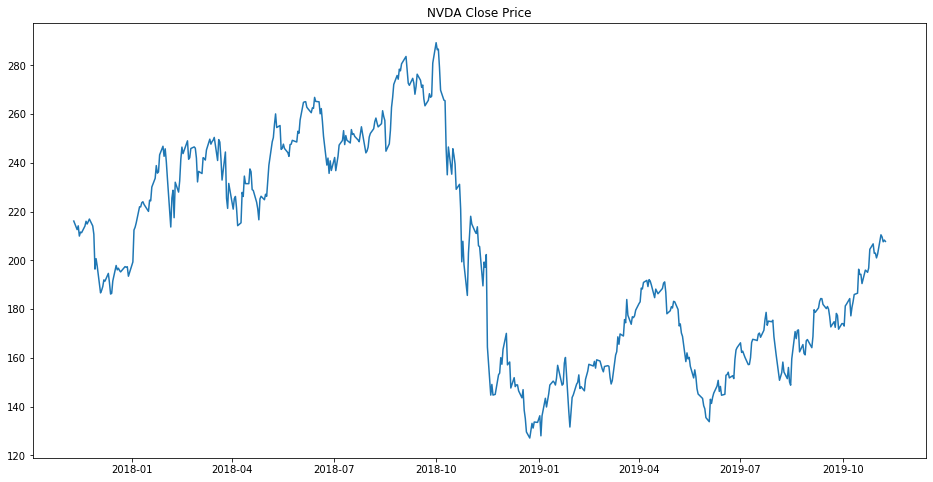

In [20]:
plt.figure(figsize=(16,8))
plt.title('NVDA Close Price')
plt.plot(nvda['Date'], nvda['Close'],  label='Close Price history')

### NVDA Daily Percent Change

Examining the Daily Percent Change, we can see that on most days, NVDA's price did not increase or decrease more than 0.05 percent. However, there were a few occasions where stock price decreased more than 0.10 percent in a day. 

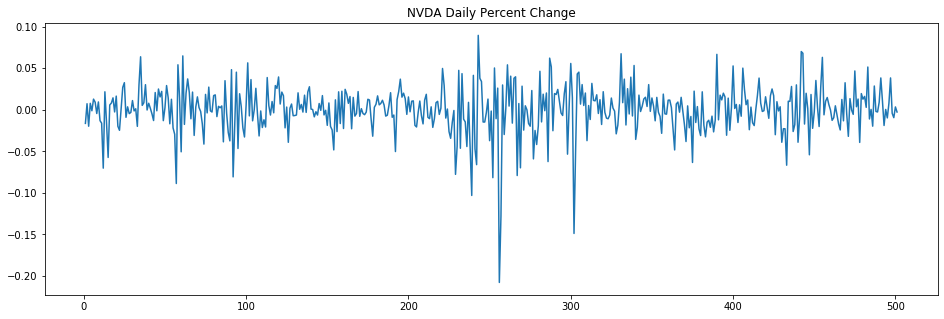

In [21]:
daily_close = nvda[['Adj Close']]

# Daily returns
daily_pct_change = daily_close.pct_change()


daily_pct_change.fillna(0, inplace=True)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns

plt.figure(figsize=(16,5))
plt.title('NVDA Daily Percent Change')
plt.plot(daily_log_returns)

In [22]:
daily_pct_change

,Adj Close
0,0.000000
1,-0.016239
2,0.007290
3,-0.019610
4,0.007763
...,...
497,0.039044
498,-0.004228
499,-0.009446
500,0.003420


### NVDA Daily Percent Change Histogram

Lets use a histogram to get a better visualization of how many days the stock increased more than 5% or decreased by 10% or more. 

As we can see there were 3 occasions where NVDA dropped more by 10% of more and 21 days where NVDA increased by more than 5%.

In [23]:
dpc = daily_pct_change['Adj Close'].sort_values()
dpc.head()

256   -0.187559
302   -0.138245
257   -0.119990
239   -0.097937
57    -0.084875
Name: Adj Close, dtype: float64

In [24]:
dpc.tail(25)

305    0.046292
281    0.047372
475    0.047792
231    0.048526
91     0.049405
221    0.050935
406    0.051360
253    0.051546
483    0.052753
288    0.052941
400    0.054127
339    0.054702
261    0.055517
58     0.055592
300    0.057271
101    0.058029
287    0.064068
455    0.065063
35     0.065814
61     0.066936
390    0.068919
331    0.069703
443    0.070318
442    0.072528
243    0.093632
Name: Adj Close, dtype: float64

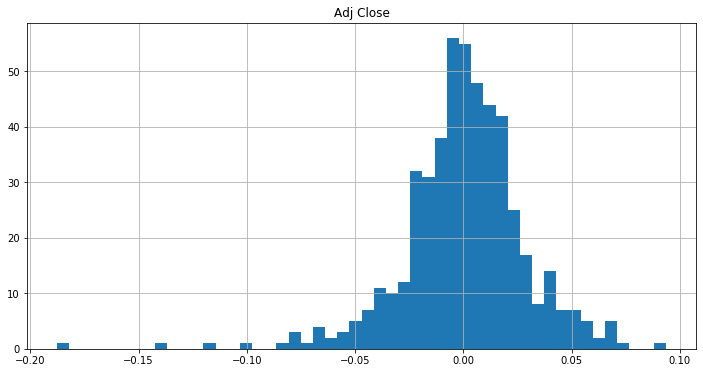

In [25]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = nvda[['Adj Close']]

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,6))

# Show the resulting plot
plt.show()

### NVDA Cumulative Daily Return

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the period of time involved.

Using the Daily Percent Change, lets visualize the Cumulative Daily Return. 

We can see that over the past 2 years NVDA has gained as much as 34% and a lost as much as 41% of its value from its 11/10/2017 price.

In [26]:
cum_daily_return = (1 + daily_pct_change).cumprod()

cum_daily_return['Adj Close'].sort_values()

280    0.590002
286    0.594227
279    0.601563
282    0.608991
303    0.610988
         ...   
203    1.315835
223    1.328729
224    1.329889
222    1.342087
0           NaN
Name: Adj Close, Length: 502, dtype: float64

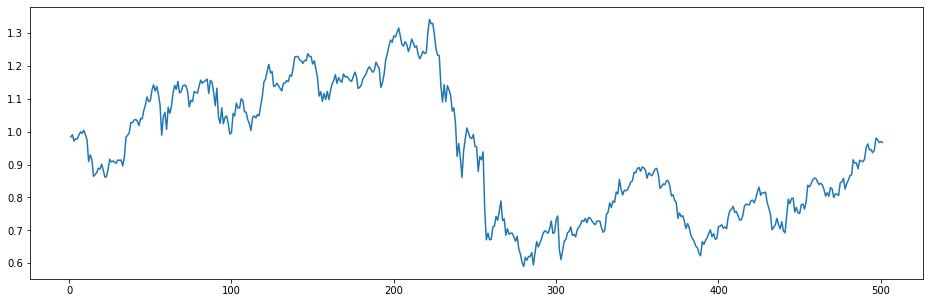

In [27]:
# Print `cum_daily_return`
plt.figure(figsize=(16,5))
plt.plot(cum_daily_return)

### NVDA 30 Day Moving Average

Now lets calculate and plot a simple 30 Day Moving Average of NVDA's price over the past 2 years. The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. This will come in handy when testing models against certain trading strategies. 

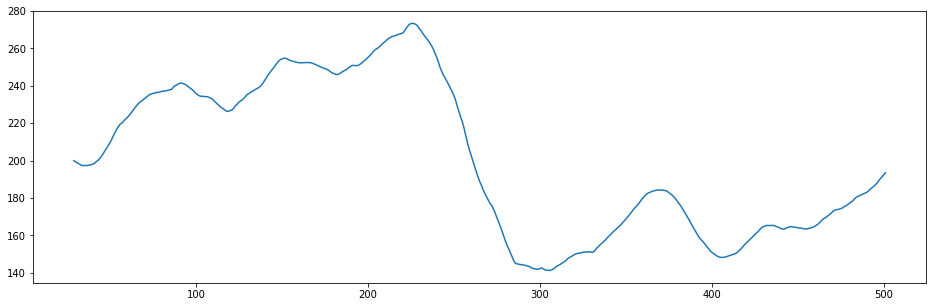

In [29]:
# Isolate the adjusted closing prices 
adj_close_px = nvda['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=30).mean()

# Inspect the result
plt.figure(figsize=(16,5))
plt.plot(moving_avg[:])
plt.show()

### NVDA Daily Volume and Average Daily Volume

Looking at NVDA's dail trade volme, we can see that daily trade volume of NVDA, or the daily number of NVDA shares traded, ranges between 4,518,800 and 62,788,200, with an average daily volume of 12,890,540 between 11/10/2017 andd 11/10/2019.


In [33]:
nvda['Volume'].sort_values()


9       4518800
472     4654600
501     4727500
168     4925900
429     4944300
         ...   
61     41865100
258    42300800
257    42445500
256    49088000
302    62788200
Name: Volume, Length: 502, dtype: int64

In [31]:
nvda['Volume'].mean()

12890540.836653387

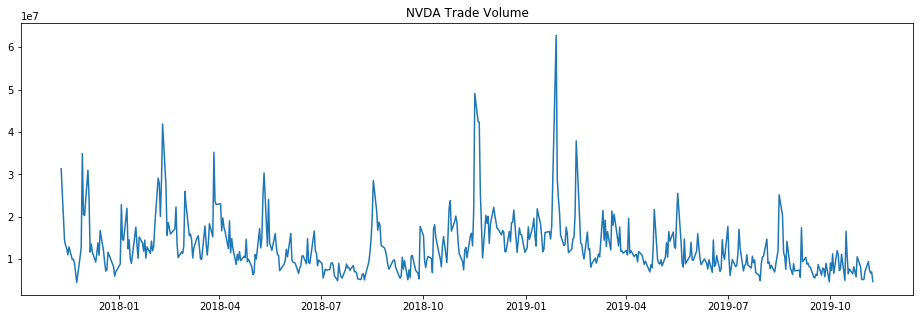

In [32]:
plt.figure(figsize=(16,5))
plt.title('NVDA Trade Volume')
plt.plot(nvda['Date'], nvda['Volume'], label='Volume history')

### Candlestick Plot for NVDA 

Now lets plot the candlestick plot for NVDA. While candlestick charts look like boxplots, they show different information than a boxplot. The "Body" of the candlestick indicates the change between open and close price, while the lower and upper shadows indicate the stocks lowest and highest price on that day. Colors are use to indicate whether the stock increased or decreased in value on a given day. For this plot, Grey is used to indicate an increase in price and Red is used to indicate a decrease. 

In [34]:
plt.figure(figsize=(16,8))

nvda = nvda[400:] 
nvda["Date"] = pd.to_datetime(nvda["Date"])

inc = nvda.Close > nvda.Open
dec = nvda.Open > nvda.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "NVDA Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(nvda.Date, nvda.High, nvda.Date, nvda.Low, color="black")
p.vbar(nvda.Date[inc], w, nvda.Open[inc], nvda.Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(nvda.Date[dec], w, nvda.Open[dec], nvda.Close[dec], fill_color="#F2583E", line_color="black")

output_notebook()
show(p)

Loading BokehJS ...

<Figure size 1152x576 with 0 Axes>

# Building the NVDA Trading Models 

Now that we have explored the our data, lets begin to build and test a number of models for predicting NVDA stock price. 

In this section we will build a Linear Regression Model to show the efficacy of Linear Regression in prediciting stock price. Then we build an ARIMA model and a LSTM model, or Long Short Term Memory Model, for predicting NVDA's stock price.

## Linear Regression Model 

First, lets take a look how simple Linear Regresion performs at predicting NVDA stock price. For this model, we are going to use the first 400 days of Close Price information to try and predict what NVDA will do over the following 102 days. 

In [35]:
## creating dataframe with date and the target variable
nvda = pd.read_csv("NVDA.csv")
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:400]
valid = new_data[400:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-102+i:].sum() + sum(preds)
    b = a/102
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(400, 2)

 Shape of validation set:
(102, 2)

 RMSE value on validation set:
20.05478593538961


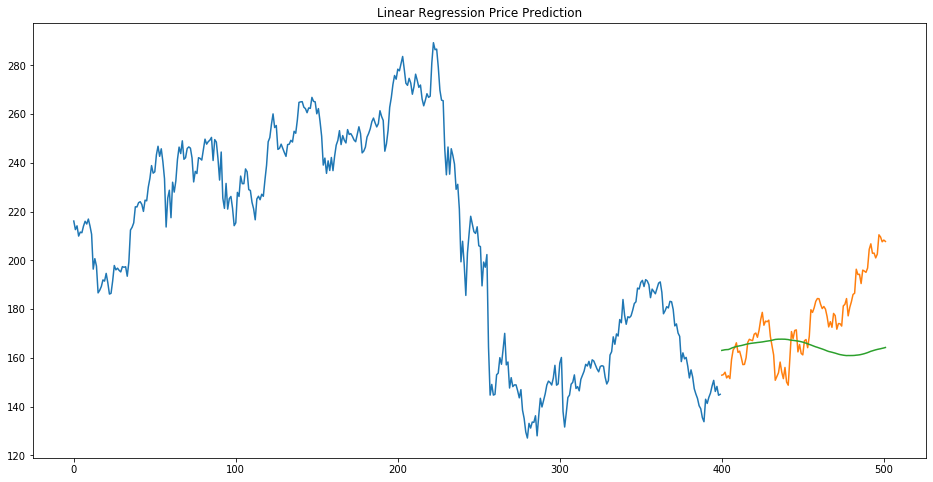

In [36]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.title('Linear Regression Price Prediction')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

### Results

As we can see, Linear Regression does not do a very good job predicting future stock prices. To effectively predict NVDA's price we are going to need to try out some more sophisticated modeling techniques. 

## ARIMA Model for Predicting NVDA Stock Price

ARIMA is an acronym for AutoRegressive Integrated Moving Average. These models are often used for Time Series Forecasting and Analysis and are very effective at forecasting stock prices.

To build a ARIMA model for NVDA, first we will look at the data and use parameter selection methods to identify the best model parameters for a ARIMA model for predicting NVDA's price.  After Identifying the ideal parameters, we will we will fit the model to the training data and then use it to try to predict NVDA's future close price. Then we will compare our models predictions to NVDA's actual close price, ie the test data. 

## Model Identification / Finding the Order

In [37]:
nvda = pd.read_csv("NVDA.csv")

In [38]:
df = nvda[['Date', 'Close']]
df.head()

,Date,Close
0,2017-11-10,216.139999
1,2017-11-13,212.630005
2,2017-11-14,214.179993
3,2017-11-15,209.979996
4,2017-11-16,211.610001


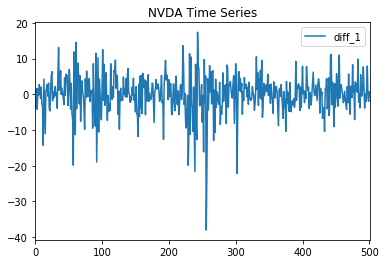

In [39]:
nvda['diff_1'] = nvda.Close - nvda.Close.shift()
nvda.plot(y='diff_1')
plt.title('NVDA Time Series')
plt.show()

Text(0.5, 1.0, 'NVDA AR PACF')

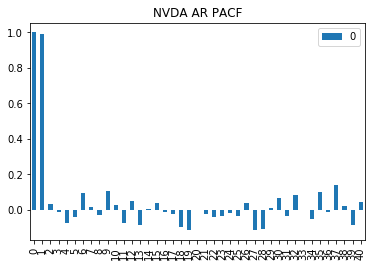

In [40]:
x_acf = pd.DataFrame(pacf(nvda.Close))
x_acf.plot(kind='bar')
plt.title("NVDA AR PACF")

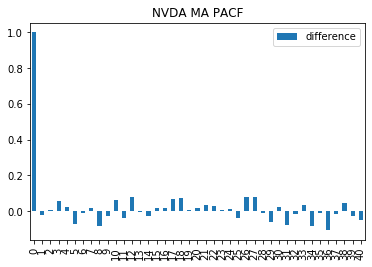

In [41]:
x_acf = pd.DataFrame(pacf(nvda.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("NVDA MA PACF")
plt.legend(['difference'])

While this is a good start for indetifying the order, lets use a more sophisticated method to pick the order rather than just eyeballing it.

## More Advanced ARIMA Parameter Selection and Optimization

Next, we are going to create a function that identifies the best ARIMA parameters for our Model. To determine which paraemeters are the best for our ARIMA model, we will be calculating the Root-Mean-Square Error(RMSE) for each model. The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed. The model with the lowest RMSE, is the model that most closely matches the test set values.  

In [43]:
nvda = pd.read_csv("NVDA.csv")
nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,213.080002,218.669998,211.630005,216.139999,214.709335,31331400
1,2017-11-13,216.139999,217.169998,212.009995,212.630005,211.222580,14559400
2,2017-11-14,213.000000,214.800003,211.229996,214.179993,212.762329,13232300
3,2017-11-15,211.949997,212.000000,207.800003,209.979996,208.590088,12548700
4,2017-11-16,212.979996,214.199997,211.250000,211.610001,210.209320,11044200


In [44]:
# load dataset
def parser(x):
    return datetime.strptime(x,'%Y-%m-%d')
series = pd.read_csv('NVDA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)



In [45]:
series = series.iloc[:, [3]]
series.head()

,Close
Date,
2017-11-10,216.139999
2017-11-13,212.630005
2017-11-14,214.179993
2017-11-15,209.979996
2017-11-16,211.610001


In [46]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, sqrt(best_score)))

In [47]:
p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1653.368
ARIMA(0, 0, 1) MSE=483.350
ARIMA(0, 1, 0) MSE=16.546
ARIMA(0, 1, 1) MSE=16.571
ARIMA(0, 1, 2) MSE=16.584
ARIMA(0, 2, 0) MSE=33.195
ARIMA(0, 2, 1) MSE=16.908
ARIMA(1, 0, 0) MSE=16.286
ARIMA(1, 0, 1) MSE=16.305
ARIMA(1, 0, 2) MSE=16.316
ARIMA(1, 1, 0) MSE=16.572
ARIMA(1, 1, 1) MSE=16.674
ARIMA(1, 2, 0) MSE=24.402
ARIMA(1, 2, 2) MSE=16.953
ARIMA(2, 0, 0) MSE=16.305
ARIMA(2, 0, 1) MSE=16.458
ARIMA(2, 0, 2) MSE=16.788
ARIMA(2, 1, 0) MSE=16.586
ARIMA(2, 1, 1) MSE=16.624
ARIMA(2, 2, 0) MSE=21.999
ARIMA(2, 2, 1) MSE=16.962
ARIMA(2, 2, 2) MSE=16.974
Best ARIMA(1, 0, 0) RMSE=4.036


### Results

After running the function, we can see that the order (1, 0 , 0) worked the best, giving us the lowest RMSE value of 4.036 Meaning, the distance between the model's test predictions and the actual test data were the closest for an model with order (1, 0 , 0). 

## Summary of the Model & Residuals

Now let's create a summary of the coefficient values used as well as how well the model fit our test data.

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  502
Model:                     ARMA(1, 0)   Log Likelihood               -1576.440
Method:                       css-mle   S.D. of innovations              5.571
Date:                Tue, 26 Nov 2019   AIC                           3158.881
Time:                        11:22:35   BIC                           3171.537
Sample:                             0   HQIC                          3163.846
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         204.8460     20.633      9.928      0.000     164.407     245.285
ar.L1.Close     0.9897      0.005    181.833      0.000       0.979       1.000
                                    Roots       

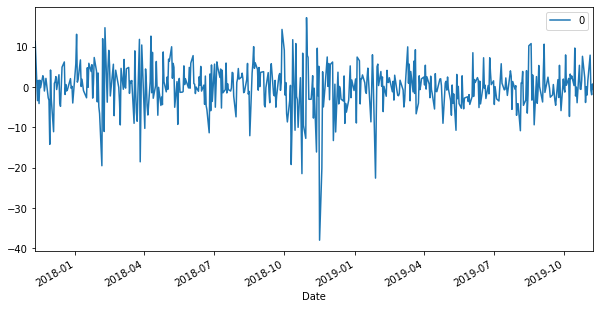

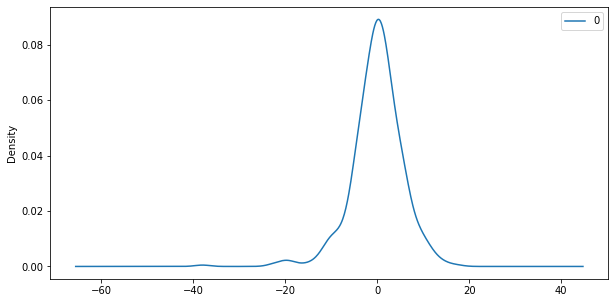

                0
count  502.000000
mean    -0.022201
std      5.598441
min    -37.985191
25%     -2.760498
50%      0.147341
75%      2.964814
max     17.182854


In [48]:
model = ARIMA(series['Close'], order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize = (10,5))
pyplot.show()
residuals.plot(kind='kde', figsize = (10,5))
pyplot.show()
print(residuals.describe())

Plotting the density of the residuals, we can see that summary of the residual errors looks good. There is a near zero mean and uniform variance.

## ARIMA Model Diagnostics 

Now lets take a look at the results compared to the actual test data.

In [49]:
series = df.values
series = np.asarray(series)
X = series[:, 1]

train, test = X[0:400], X[400:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

predicted=145.512398, expected=152.880005
predicted=153.328116, expected=153.119995
predicted=153.564716, expected=154.100006
predicted=154.537370, expected=151.759995
predicted=152.207118, expected=152.660004
predicted=153.100608, expected=151.479996
predicted=151.924232, expected=159.259995
predicted=159.663045, expected=163.229996
predicted=163.607890, expected=164.229996
predicted=164.600037, expected=166.169998
predicted=166.526228, expected=162.229996
predicted=162.610382, expected=162.750000
predicted=163.125656, expected=160.229996
predicted=160.619569, expected=157.210007
predicted=157.615400, expected=157.309998
predicted=157.713172, expected=160.059998
predicted=160.445815, expected=166.279999
predicted=166.626548, expected=167.610001
predicted=167.946547, expected=167.270004
predicted=167.607594, expected=167.080002
predicted=167.417695, expected=169.710007
predicted=170.028801, expected=170.179993
predicted=170.494404, expected=168.440002
predicted=168.765438, expected=171

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.086


### Results

The results look good! Now lets visualize the ARIMA Model to how it performed vs. the test data. 

## Plotting the ARIMA Model vs Test Data

In [51]:
series = pd.DataFrame(series)
series.columns = ['Date', 'Close']
series.head()

,Date,Close
0,2017-11-10,216.14
1,2017-11-13,212.63
2,2017-11-14,214.18
3,2017-11-15,209.98
4,2017-11-16,211.61


In [52]:
series['Date'] = pd.to_datetime(series.Date,format='%Y-%m-%d')

In [53]:
X1 = series[['Date']]
X2 = X1[400:]
X3 = X1[350:]
X4 = X1[:400]

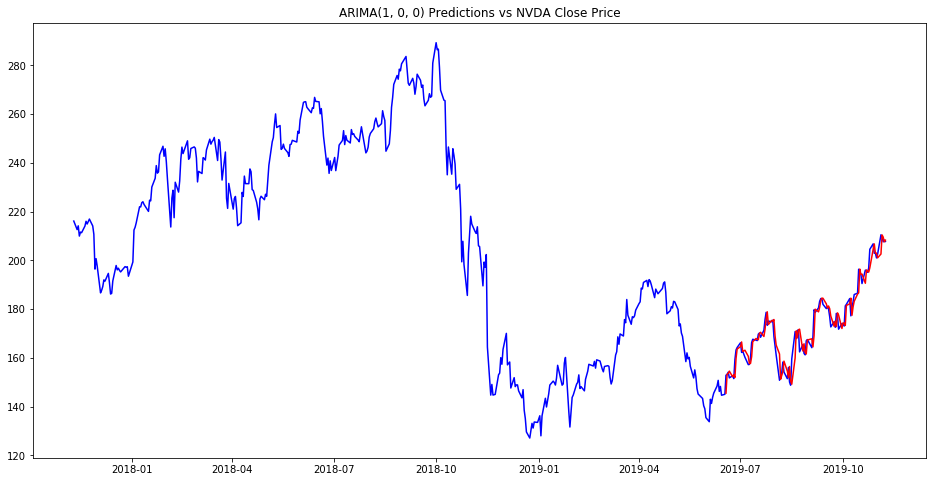

In [56]:
plt.figure(figsize=(16,8))
plt.title('ARIMA(1, 0, 0) Predictions vs NVDA Close Price')
plt.plot(X1, history, color="blue")
plt.plot(X2, predictions, color='red')


Let's zoom in just on the test data. 

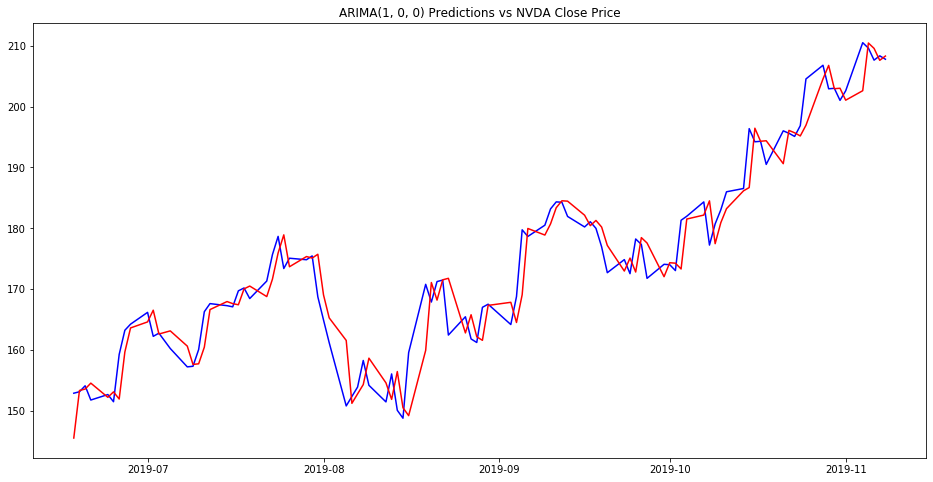

In [57]:
plt.figure(figsize=(16,8))
plt.title('ARIMA(1, 0, 0) Predictions vs NVDA Close Price')
plt.plot(X2, history[400:], color="blue")
plt.plot(X2, predictions, color='red')


### Results

The ARIMA model looks good and appears to perform well at prediction NVDA's price. 

In [69]:
predictions = pd.DataFrame(predictions, columns=['Predictions'])
predictions.head()

,Predictions
0,145.512398
1,153.328116
2,153.564716
3,154.537370
4,152.207118


In [70]:
#save a datafram to use for backtesting
bestARIMA = predictions
bestARIMA.head()

,Predictions
0,145.512398
1,153.328116
2,153.564716
3,154.537370
4,152.207118


# LSTM  Price Prediction Model for NVDA

The next step will be to create a Price Prediction Model for NVDA using a basic LSTM neural network. 

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in deep learning which can be used to classify, process and making predictions based on time series data. LSTMs are particularly good at making time series predictions because they can selectively remember patterns for long durations of time. 

To build the LSTM Price Prediction Model, we will build and test a number of simple LSTM models using different parameters and then evaluate each model by seeing which one yields the lowest RMSE value.  The parameters we will be tweeking to find the best model are the number of days in the past we want the model to look at and the number of Epochs. The Epoch is the number of times the data is passed forward and backward through the neural network. 

## Using Previous 60 Days to Predict Stock Price

In [71]:
nvda = pd.read_csv("NVDA.csv")


#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
 - 56s - loss: 0.0169


In [72]:
len(x_train)

340

### Calculating RMSE

In [73]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 7.638


### Plotting the Model  Predictions vs. Test Data

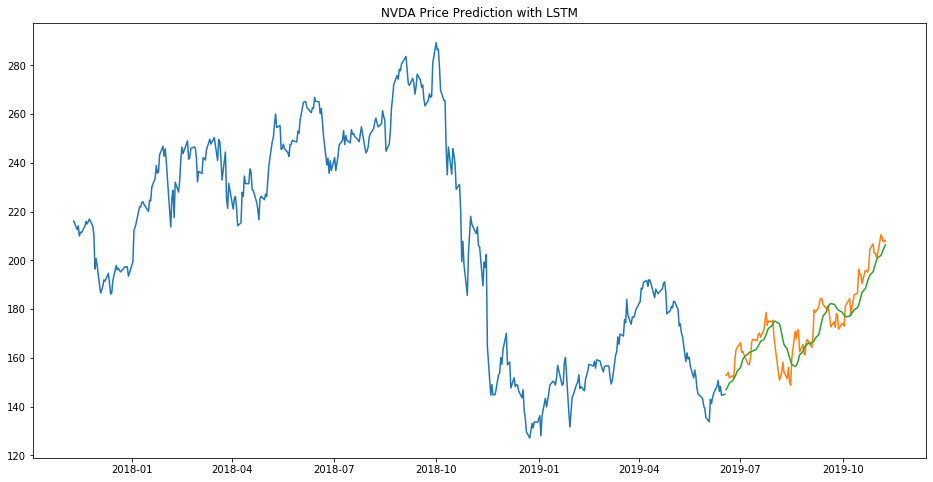

In [74]:
#for plotting
train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

## Using Previous 150 Days to Predict Stock Price

In [75]:
nvda = pd.read_csv("NVDA.csv")


#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(150,len(train)):
    x_train.append(scaled_data[i-150:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 150:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(150,inputs.shape[0]):
    X_test.append(inputs[i-150:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


Epoch 1/1
 - 110s - loss: 0.0143


### Calculating RMSE

In [276]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 10.707


### Plotting the Model  Predictions vs. Test Data

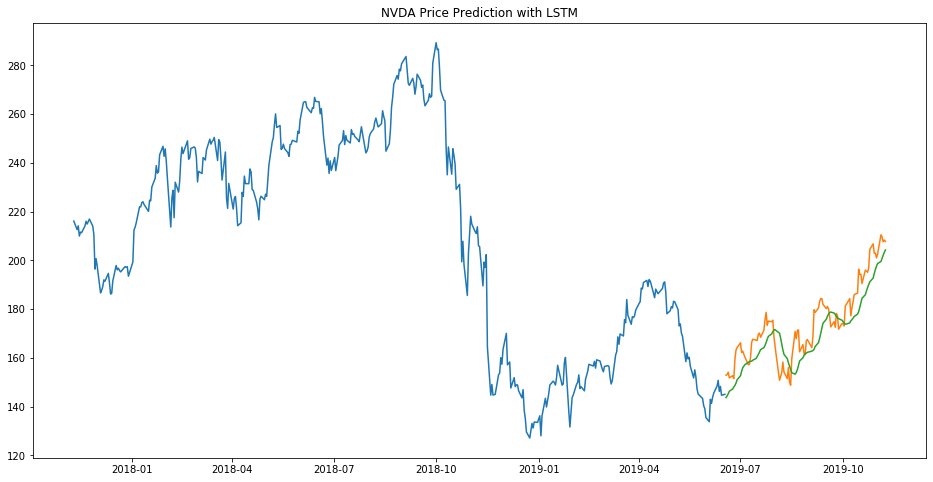

In [76]:
#for plotting
train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

## Using previous 300 days to Predict Stock price

In [77]:
nvda = pd.read_csv("NVDA.csv")

#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(300,len(train)):
    x_train.append(scaled_data[i-300:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 300:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(300,inputs.shape[0]):
    X_test.append(inputs[i-300:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


Epoch 1/1
 - 83s - loss: 0.0068


### Calculating RMSE

In [78]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 9.489


### Plotting the Model  Predictions vs. Test Data

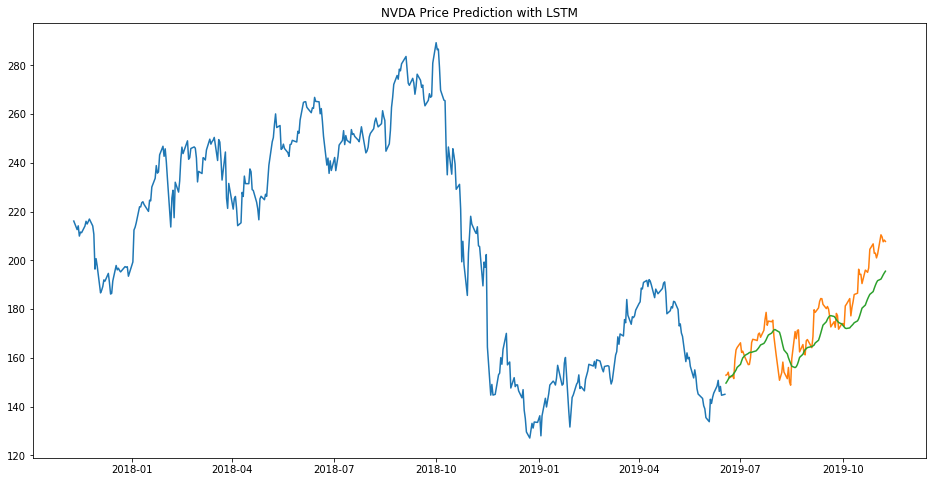

In [79]:
#for plotting
train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

## Using Previous 60 days and 2 Epochs

In [80]:
nvda = pd.read_csv("NVDA.csv")


#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=2, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/2
 - 57s - loss: 0.0168
Epoch 2/2
 - 53s - loss: 0.0067


### Calculating RMSE

In [81]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 7.450


### Plotting the Model  Predictions vs. Test Data

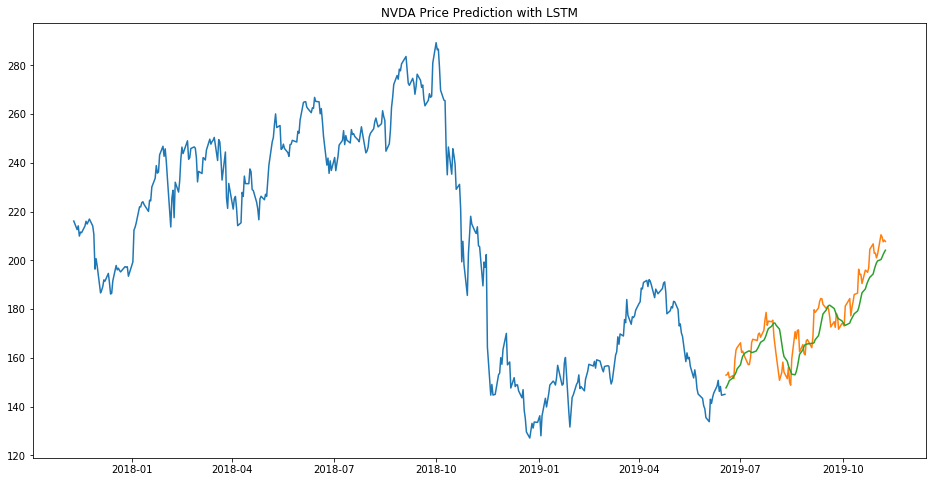

In [82]:
#for plotting
train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

## Using previous 60 days to 10 Epochs

In [83]:
nvda = pd.read_csv("NVDA.csv")

#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/10
 - 57s - loss: 0.0145
Epoch 2/10
 - 53s - loss: 0.0062
Epoch 3/10
 - 52s - loss: 0.0042
Epoch 4/10
 - 53s - loss: 0.0038
Epoch 5/10
 - 53s - loss: 0.0030
Epoch 6/10
 - 54s - loss: 0.0026
Epoch 7/10
 - 54s - loss: 0.0021
Epoch 8/10
 - 54s - loss: 0.0021
Epoch 9/10
 - 54s - loss: 0.0021
Epoch 10/10
 - 54s - loss: 0.0024


### Calculating RMSE

In [84]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 7.790


### Plotting the Model  Predictions vs. Test Data

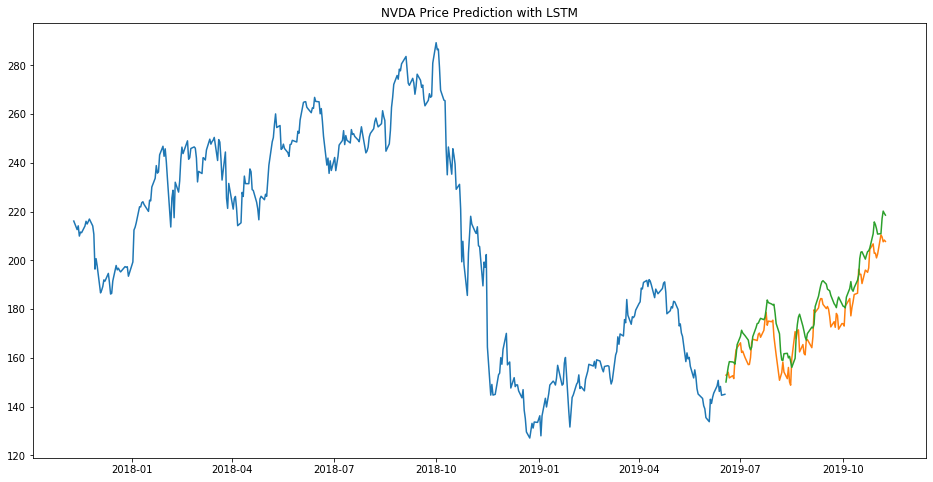

In [85]:
#for plotting
train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

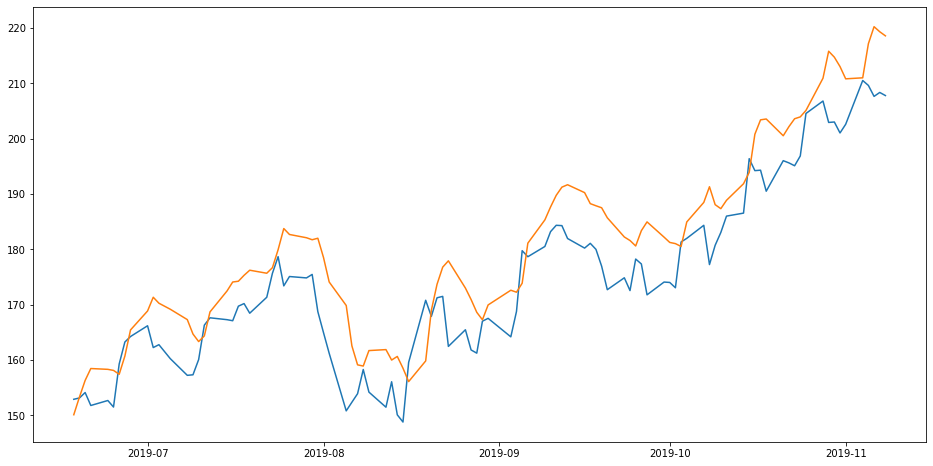

In [86]:
plt.figure(figsize=(16,8))
plt.plot(X2, valid[['Close','Predictions']])

## Using Previous 15 Days and 10 Epochs to Predict Stock Price

In [87]:
#creating dataframe
data = nvda.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(nvda)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:400,:]
valid = dataset[400:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(15,len(train)):
    x_train.append(scaled_data[i-15:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2)


inputs = new_data[len(new_data) - len(valid) - 15:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(15,inputs.shape[0]):
    X_test.append(inputs[i-15:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/10
 - 22s - loss: 0.0138
Epoch 2/10
 - 16s - loss: 0.0059
Epoch 3/10
 - 16s - loss: 0.0039
Epoch 4/10
 - 16s - loss: 0.0032
Epoch 5/10
 - 16s - loss: 0.0027
Epoch 6/10
 - 16s - loss: 0.0025
Epoch 7/10
 - 16s - loss: 0.0020
Epoch 8/10
 - 16s - loss: 0.0020
Epoch 9/10
 - 16s - loss: 0.0022
Epoch 10/10
 - 16s - loss: 0.0019


### Calculating RMSE

In [88]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))

print('RMSE: %.3f' % rms)

RMSE: 4.483


### Plotting the Model  Predictions vs. Test Data

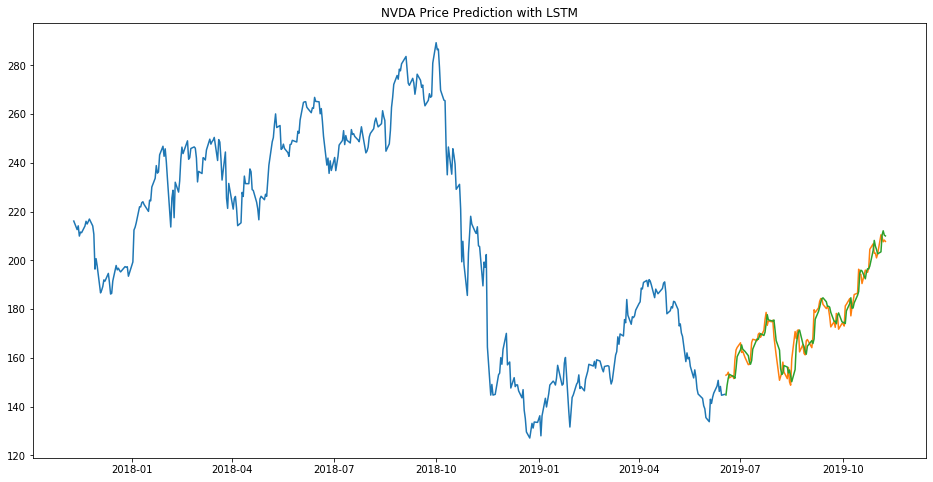

In [89]:

train = new_data[:400]
valid = new_data[400:]
valid['Predictions'] = closing_price


plt.figure(figsize=(16,8))

plt.title('NVDA Price Prediction with LSTM')
plt.plot(X4, train['Close'])
plt.plot(X2, valid[['Close','Predictions']])

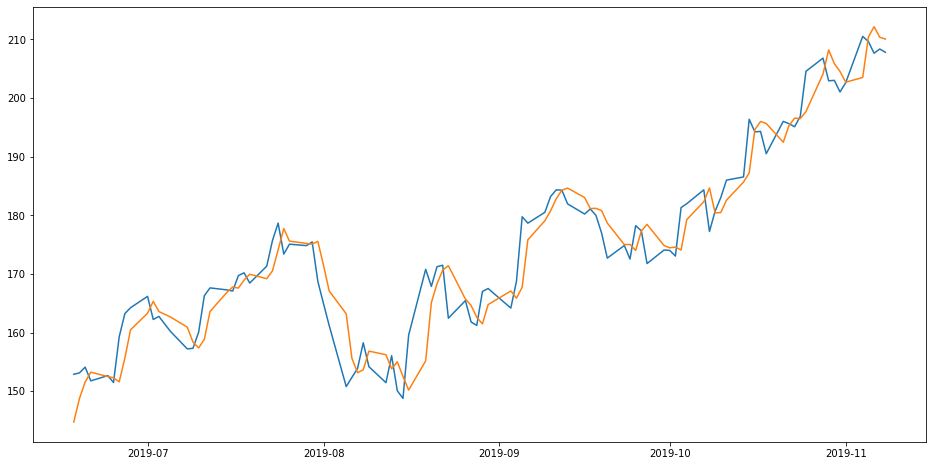

In [90]:
plt.figure(figsize=(16,8))
plt.plot(X2, valid[['Close','Predictions']])

## Results

After running the LSTM models with different parameters, the LSTMmodel that performed best was the one that looked 15 days into past and used 10 Epochs.

In [91]:
valid

,Close,Predictions
Date,,
2019-06-18,152.88,144.740753
2019-06-19,153.12,148.757050
2019-06-20,154.1,151.562134
2019-06-21,151.76,153.242920
2019-06-24,152.66,152.490723
...,...,...
2019-11-04,210.5,203.490555
2019-11-05,209.61,210.386993
2019-11-06,207.63,212.149475


In [92]:
bestlstm = valid
bestlstm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 2019-06-18 to 2019-11-08
Data columns (total 2 columns):
Close          102 non-null object
Predictions    102 non-null float32
dtypes: float32(1), object(1)
memory usage: 2.0+ KB


# Testing the Models

## Method for Testing Models

Now that we have chosen the best ARIMA and LSTM model, lets combine those prediction models with a trading strategy and see how well they perform at trading NVDA. To do this we will use 3 different trading strategies for each model. These startegies are 1) 5 Day Exponential Moving Average Cross, 2) 30 Day Moving Average Cross, and a Buy Low, High Strategy. 

In the 5 Day Exponential Moving Average Cross strategy, I will create a function that signals to sell NVDA when the models predicted price line crosses below the 5 Day EMA line.  The Model will signal to buy when the price line crosses above the 5 Day EMA line. The Model will signal to hold while the price line is above or below the 5 Day EMA.

In the 30 Day Moving Average Cross strategy, I will create a function that signals to sell NVDA when the models predicted price line crosses below the 30 Day MA line.  The Model will signal to buy when the price line crosses above the 30 Day MA line. The Model will signal to hold while the price line is below or above the 30 Day MA.

In the Buy Low, Sell High strategy, I will create a function that signals to sell NVDA when the model predicts that the prices will drop from the previous close and buy when the model predicts that prices will rise from the previous close.

I will then backtest each model against NVDA's Adjusted close price using an artificial portfolio with a \\$100,000 initial value. The model and price strategy will signal buy hold and sell positions when the strategies signals are trigger. The best model will be the one that delivers the highest return on investment resulting in the largest portfolio value at the end of the time series. 

I will also calculate the sharpe ratio of each strategy. The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.

In [111]:
nvda = pd.read_csv("NVDA.csv")
nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,213.080002,218.669998,211.630005,216.139999,214.709335,31331400
1,2017-11-13,216.139999,217.169998,212.009995,212.630005,211.222580,14559400
2,2017-11-14,213.000000,214.800003,211.229996,214.179993,212.762329,13232300
3,2017-11-15,211.949997,212.000000,207.800003,209.979996,208.590088,12548700
4,2017-11-16,212.979996,214.199997,211.250000,211.610001,210.209320,11044200


In [112]:
closePrice = nvda[['Date', 'Adj Close']]
CP = closePrice[:]
CP 
CPminus1 = closePrice[398:399] 
CPminus1 = CPminus1['Adj Close']
CPminus1 = 144.496964
CP.info()

CPint = CP['Adj Close'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 2 columns):
Date         502 non-null object
Adj Close    502 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [113]:
CPint = pd.DataFrame(CPint)
CPint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 1 columns):
Adj Close    502 non-null int64
dtypes: int64(1)
memory usage: 4.0 KB


In [114]:
CPint.head()

,Adj Close
0,214
1,211
2,212
3,208
4,210


## Plotting Bollinger Bands and 30 Day Moving Average

Now let's create a plot of the upper and lower bollinger bands, along with the 30 day moving average and adjusted close of NVDA. 

Bollinger Bands are a type of statistical chart characterizing the prices and volatility over time of a financial instrument or commodity. It is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price. Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.

While I will not be using the bollinger bands in this model, I have included them as I will use them later on when I expand on this model. 


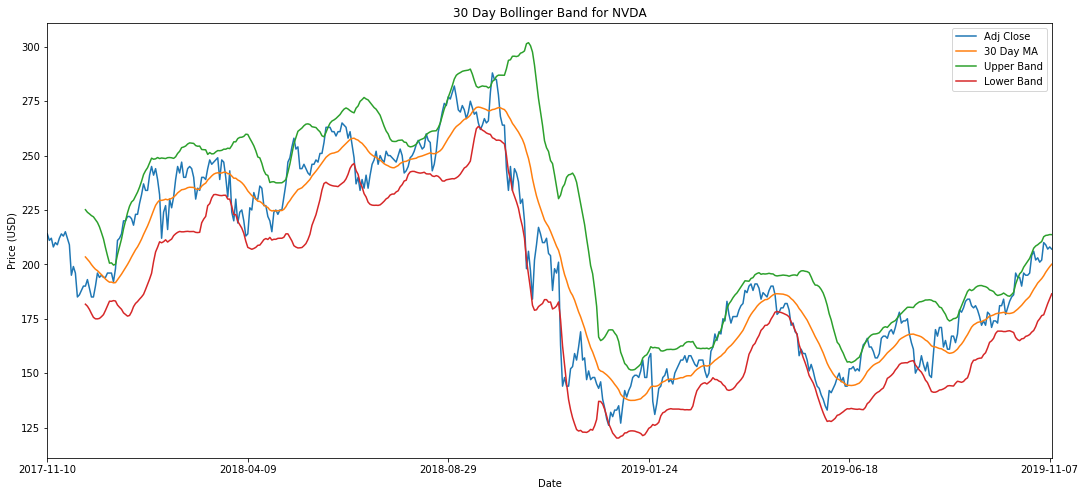

In [115]:
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in CPint:
    CPint['30 Day MA'] = CPint['Adj Close'].rolling(window=20).mean()
    CPint['30 Day STD'] = CPint['Adj Close'].rolling(window=20).std()
    CPint['Upper Band'] = CPint['30 Day MA'] + (CPint['30 Day STD'] * 2)
    CPint['Lower Band'] = CPint['30 Day MA'] - (CPint['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
CPint.index = nvda['Date']
nvdaboll = CPint
nvdaboll[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(18,8))
plt.title('30 Day Bollinger Band for NVDA')
plt.ylabel('Price (USD)')
plt.show()


In [116]:
for item in CPint:
    CPint['5 Day SMA'] = CPint['Adj Close'].rolling(window=5).mean()
    

In [117]:
CPint['5dayEMA'] = CPint['5 Day SMA'][5]
# add 5day EMA to all values
for day in range(7,len(CPint)+1):
    CPint['5dayEMA'][day-1] = round(0.33*(CPint['Adj Close'][day-1]-CPint['5dayEMA'][day-2])+CPint['5dayEMA'][day-2],
                                    2)
 
CPint

,Adj Close,30 Day MA,30 Day STD,Upper Band,Lower Band,5 Day SMA,5dayEMA
Date,,,,,,,
2017-11-10,214,NaN,NaN,NaN,NaN,NaN,210.00
2017-11-13,211,NaN,NaN,NaN,NaN,NaN,210.00
2017-11-14,212,NaN,NaN,NaN,NaN,NaN,210.00
2017-11-15,208,NaN,NaN,NaN,NaN,NaN,210.00
2017-11-16,210,NaN,NaN,NaN,NaN,211.0,210.00
...,...,...,...,...,...,...,...
2019-11-04,210,194.75,8.967045,212.684090,176.815910,203.6,204.38
2019-11-05,209,196.35,8.474575,213.299150,179.400850,205.0,205.90
2019-11-06,207,197.70,7.861298,213.422595,181.977405,205.8,206.26


## Testing Long Short Cross Strategy Model

As a baseline for my models' preformances, I going to plot a commonly used trading strategy called a Long Short Cross. In this strategy, the model is signaled to buy when the Short Moving Average Line crosses above the Long Moving Average Line, and sell when the Short Moving Average Line crosses belwo the Long Moving Average Line.

In [118]:
# Initialize the short and long windows
short_window = 5
long_window = 30

# Initialize the `signals` DataFrame with the `signal` column
signals = nvda[['Date', 'Close']]

signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = nvda['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = nvda['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
signals

,Date,Close,signal,short_mavg,long_mavg,positions
0,2017-11-10,216.139999,0.0,216.139999,216.139999,NaN
1,2017-11-13,212.630005,0.0,214.385002,214.385002,0.0
2,2017-11-14,214.179993,0.0,214.316666,214.316666,0.0
3,2017-11-15,209.979996,0.0,213.232498,213.232498,0.0
4,2017-11-16,211.610001,0.0,212.907999,212.907999,0.0
...,...,...,...,...,...,...
497,2019-11-04,210.500000,1.0,204.006000,189.078666,0.0
498,2019-11-05,209.610001,1.0,205.344000,190.314666,0.0
499,2019-11-06,207.630005,1.0,206.270001,191.294666,0.0
500,2019-11-07,208.339996,1.0,207.734000,192.327999,0.0


In [119]:
signals.signal.value_counts()

1.0    298
0.0    204
Name: signal, dtype: int64

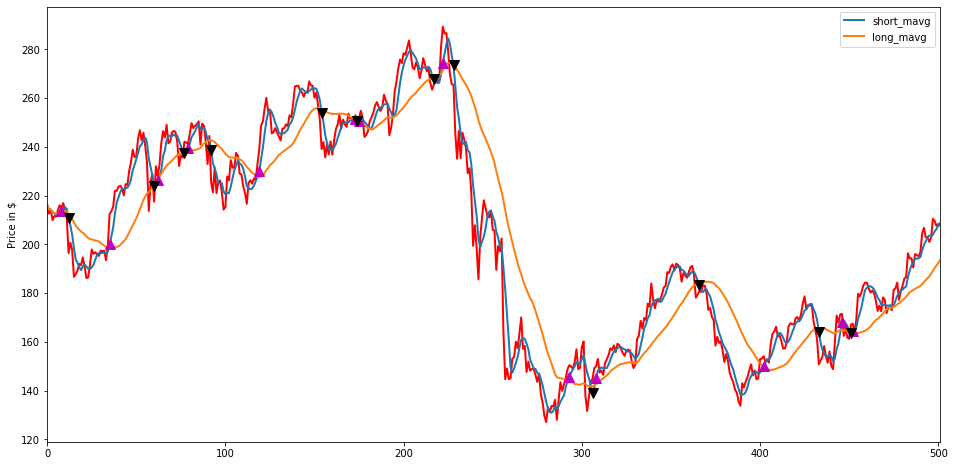

In [120]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
nvda['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### Backtesting Long Short Cross 

In [121]:
# Set the initial capital

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['NVDA'] = 650*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(nvda['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(nvda['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(nvda['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()


portfolio['total returns'] = (portfolio['total']/100000 -1) *100

# Print the first lines of `portfolio`
portfolio.head()

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.0
1,0.0,0.0,100000.0,100000.0,0.0,0.0
2,0.0,0.0,100000.0,100000.0,0.0,0.0
3,0.0,0.0,100000.0,100000.0,0.0,0.0
4,0.0,0.0,100000.0,100000.0,0.0,0.0


### Plotting Total Portfolio Value Over Time

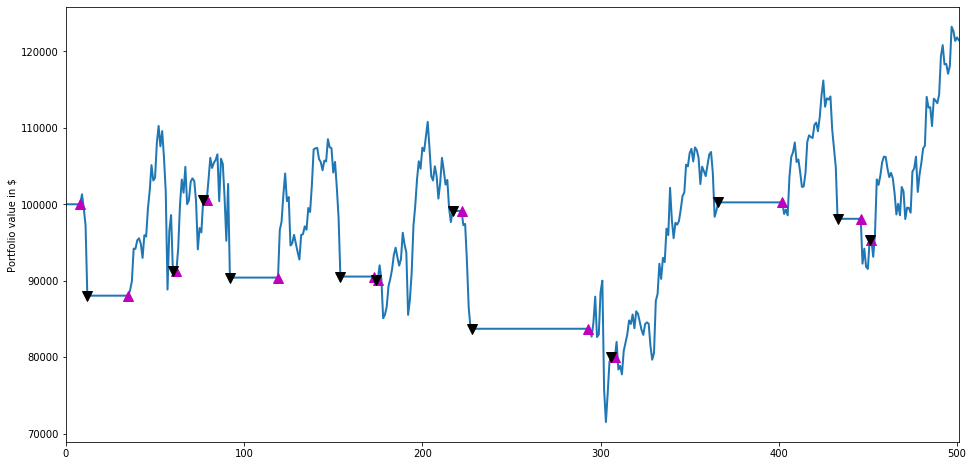

In [122]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [123]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
497,136825.00000,136825.00000,-13583.3556,123241.64440,0.043535,23.241644
498,136246.50065,136246.50065,-13583.3556,122663.14505,-0.004694,22.663145
499,134959.50325,134959.50325,-13583.3556,121376.14765,-0.010492,21.376148
500,135420.99740,135420.99740,-13583.3556,121837.64180,0.003802,21.837642
501,135056.99935,135056.99935,-13583.3556,121473.64375,-0.002988,21.473644


### Sharpe Ratio

In [124]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.44881131203391517


## Testing the 5 Day Exponential Moving Average vs 30 Day Moving Average Cross Strategy Model

Because the long cross strategy model performed so well, I am going to test a another simple cross strategy model called a 5 Day EMA v 30 Day MA Cross Strategy to see how it performs. This strategy functions in the same manner as the Long Cross Strategy

In [125]:
CPint
CPint.rename(columns = {'5dayEMA':'FiveDayEMA'}, inplace = True)
CPint.rename(columns = {'30 Day MA':'ThirtyDayMA'}, inplace = True)

In [126]:
test5d = CPint[['Adj Close', 'ThirtyDayMA', 'FiveDayEMA']]
test5d['Date'] = CPint.index
test5d = test5d.reset_index(drop=True)
test5d.head()

,Adj Close,ThirtyDayMA,FiveDayEMA,Date
0,214,NaN,210.0,2017-11-10
1,211,NaN,210.0,2017-11-13
2,212,NaN,210.0,2017-11-14
3,208,NaN,210.0,2017-11-15
4,210,NaN,210.0,2017-11-16


In [127]:
# Initialize the short and long windows
short_window = 5
long_window = 30

signals  = pd.DataFrame
# Initialize the `signals` DataFrame with the `signal` column
signals = test5d[['Date','Adj Close', 'FiveDayEMA', 'ThirtyDayMA']]

signals['signal'] = 0.0

# Create signals
signals['signal'][short_window:] = np.where(signals['FiveDayEMA'][short_window:] 
                                            > signals['ThirtyDayMA'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,signal,positions
0,2017-11-10,214,210.00,NaN,0.0,NaN
1,2017-11-13,211,210.00,NaN,0.0,0.0
2,2017-11-14,212,210.00,NaN,0.0,0.0
3,2017-11-15,208,210.00,NaN,0.0,0.0
4,2017-11-16,210,210.00,NaN,0.0,0.0
...,...,...,...,...,...,...
497,2019-11-04,210,204.38,194.75,1.0,0.0
498,2019-11-05,209,205.90,196.35,1.0,0.0
499,2019-11-06,207,206.26,197.70,1.0,0.0
500,2019-11-07,208,206.83,198.95,1.0,0.0


In [128]:
signals.positions.value_counts()

 0.0    470
 1.0     16
-1.0     15
Name: positions, dtype: int64

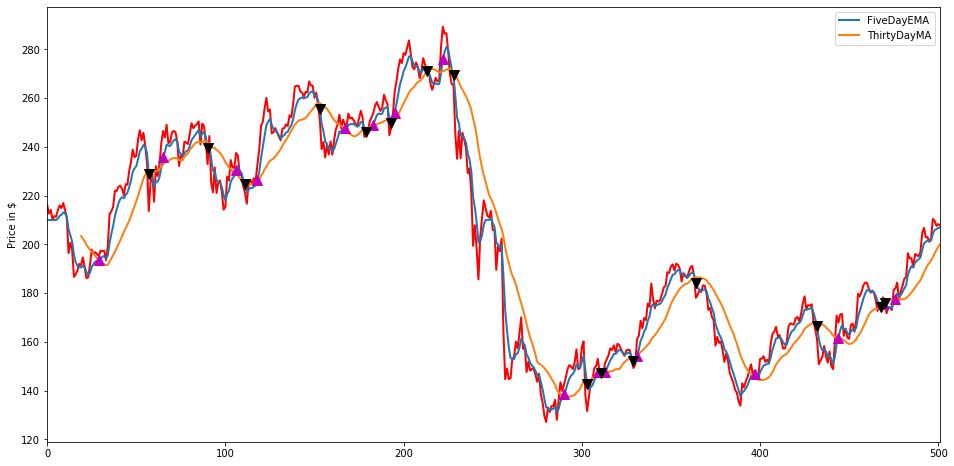

In [129]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
nvda['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['FiveDayEMA', 'ThirtyDayMA']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.FiveDayEMA[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.FiveDayEMA[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting 5 Day EMA vs 30 Day MA Cross Strategy

In [130]:
# Set the initial capital

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(nvda['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(nvda['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(nvda['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100

# Print the first lines of `portfolio`
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
497,136825.00000,136825.00000,-20214.2539,116610.74610,0.046125,16.610746
498,136246.50065,136246.50065,-20214.2539,116032.24675,-0.004961,16.032247
499,134959.50325,134959.50325,-20214.2539,114745.24935,-0.011092,14.745249
500,135420.99740,135420.99740,-20214.2539,115206.74350,0.004022,15.206744
501,135056.99935,135056.99935,-20214.2539,114842.74545,-0.003160,14.842745


### Plotting Total Portfolio Value Over Time

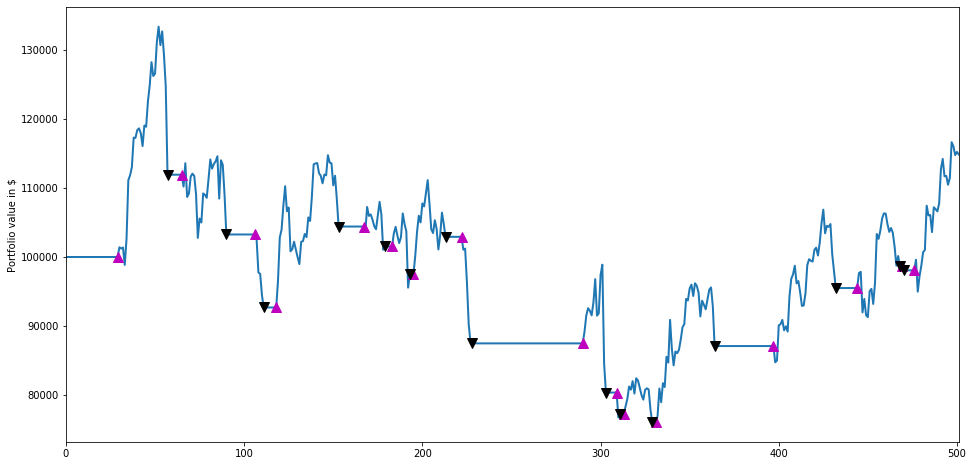

In [131]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [132]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
497,136825.00000,136825.00000,-20214.2539,116610.74610,0.046125,16.610746
498,136246.50065,136246.50065,-20214.2539,116032.24675,-0.004961,16.032247
499,134959.50325,134959.50325,-20214.2539,114745.24935,-0.011092,14.745249
500,135420.99740,135420.99740,-20214.2539,115206.74350,0.004022,15.206744
501,135056.99935,135056.99935,-20214.2539,114842.74545,-0.003160,14.842745


### Sharpe Ratio

In [133]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.37698788218120954


# Testing the ARIMA Model

Now lets see how my ARIMA model performs implementing the three trading strategies I outlined.

In [134]:
CPint400 = CPint[400:]

In [135]:
testARIMA = CPint400[['Adj Close', 'ThirtyDayMA', 'FiveDayEMA']]
testARIMA['Date'] = CPint400.index
testARIMA = testARIMA.reset_index(drop=True)
testARIMA

,Adj Close,ThirtyDayMA,FiveDayEMA,Date
0,152,144.40,147.45,2019-06-18
1,152,144.30,148.95,2019-06-19
2,153,144.40,150.29,2019-06-20
3,151,144.60,150.52,2019-06-21
4,152,145.00,151.01,2019-06-24
...,...,...,...,...
97,210,194.75,204.38,2019-11-04
98,209,196.35,205.90,2019-11-05
99,207,197.70,206.26,2019-11-06
100,208,198.95,206.83,2019-11-07


In [136]:
bestARIMA = bestARIMA.reset_index(drop=True)
bestARIMA.head()

,Predictions
0,145.512398
1,153.328116
2,153.564716
3,154.537370
4,152.207118


In [137]:
testARIMA['Predictions'] = bestARIMA['Predictions']
testARIMA.head()


,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions
0,152,144.4,147.45,2019-06-18,145.512398
1,152,144.3,148.95,2019-06-19,153.328116
2,153,144.4,150.29,2019-06-20,153.564716
3,151,144.6,150.52,2019-06-21,154.537370
4,152,145.0,151.01,2019-06-24,152.207118


In [138]:
# Initialize the short and long windows
short_window = 1
long_window = 5

signals  = pd.DataFrame
# Initialize the `signals` DataFrame with the `signal` column
signals = testARIMA[['Date','Adj Close', 'FiveDayEMA', 'ThirtyDayMA', 'Predictions']]

signals.head()

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions
0,2019-06-18,152,147.45,144.4,145.512398
1,2019-06-19,152,148.95,144.3,153.328116
2,2019-06-20,153,150.29,144.4,153.564716
3,2019-06-21,151,150.52,144.6,154.537370
4,2019-06-24,152,151.01,145.0,152.207118


## ARIMA Model vs 30 Day Moving Average Cross Strategy 


In [139]:
signals['signal'] = 0.0

# Create signals
signals['signal'][short_window:] = np.where(signals['Predictions'][short_window:] 
                                            > signals['ThirtyDayMA'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


# Print `signals`
signals

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions,signal,positions
0,2019-06-18,152,147.45,144.40,145.512398,0.0,NaN
1,2019-06-19,152,148.95,144.30,153.328116,1.0,1.0
2,2019-06-20,153,150.29,144.40,153.564716,1.0,0.0
3,2019-06-21,151,150.52,144.60,154.537370,1.0,0.0
4,2019-06-24,152,151.01,145.00,152.207118,1.0,0.0
...,...,...,...,...,...,...,...
97,2019-11-04,210,204.38,194.75,202.605493,1.0,0.0
98,2019-11-05,209,205.90,196.35,210.445797,1.0,0.0
99,2019-11-06,207,206.26,197.70,209.563715,1.0,0.0
100,2019-11-07,208,206.83,198.95,207.601124,1.0,0.0


In [140]:
signals.signal.value_counts()

1.0    83
0.0    19
Name: signal, dtype: int64

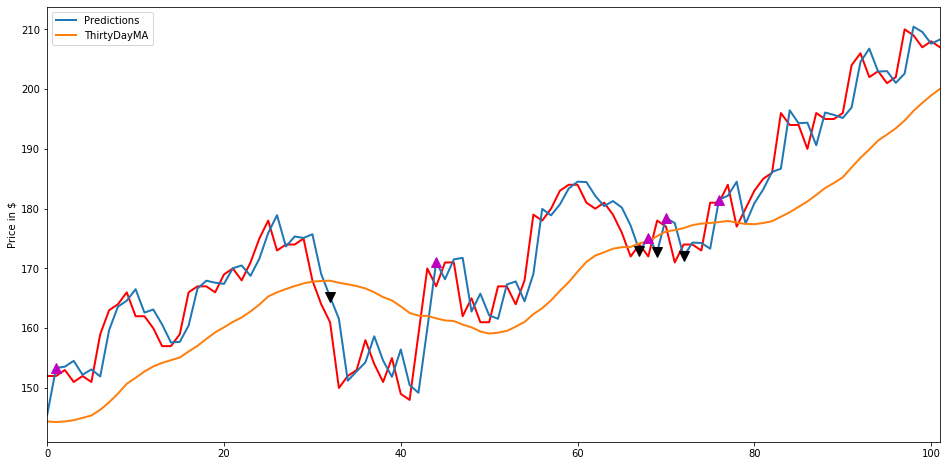

In [141]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
signals['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['Predictions', 'ThirtyDayMA']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting ARIMA Model vs 30 Day Moving Average Cross Strategy 

In [142]:
# Set the initial capital

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100

# Print the first lines of `portfolio`
portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,98800.0,98800.0,1200.0,100000.0,0.000000,0.00
2,99450.0,99450.0,1200.0,100650.0,0.006500,0.65
3,98150.0,98150.0,1200.0,99350.0,-0.012916,-0.65
4,98800.0,98800.0,1200.0,100000.0,0.006543,0.00
...,...,...,...,...,...,...
97,136500.0,136500.0,-5300.0,131200.0,0.041270,31.20
98,135850.0,135850.0,-5300.0,130550.0,-0.004954,30.55
99,134550.0,134550.0,-5300.0,129250.0,-0.009958,29.25
100,135200.0,135200.0,-5300.0,129900.0,0.005029,29.90


### Plotting Total Portfolio Value Over Time

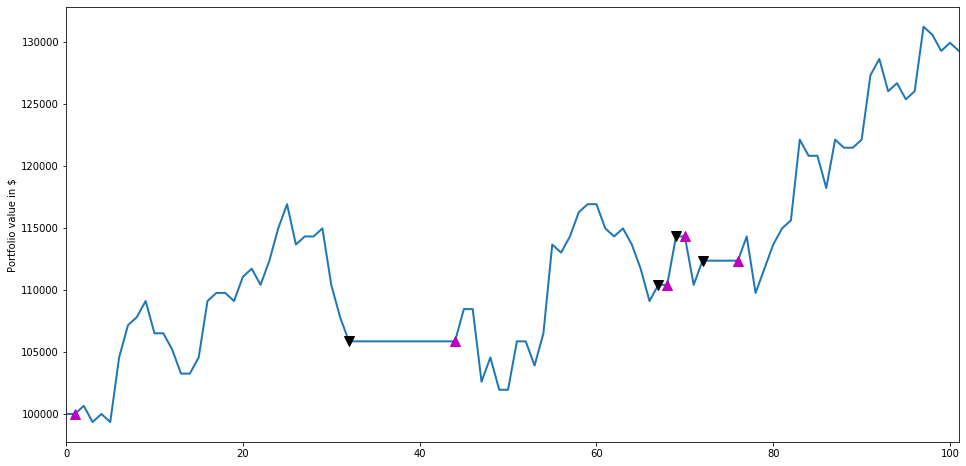

In [143]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [144]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,136500.0,136500.0,-5300.0,131200.0,0.041270,31.20
98,135850.0,135850.0,-5300.0,130550.0,-0.004954,30.55
99,134550.0,134550.0,-5300.0,129250.0,-0.009958,29.25
100,135200.0,135200.0,-5300.0,129900.0,0.005029,29.90
101,134550.0,134550.0,-5300.0,129250.0,-0.005004,29.25


### Sharpe Ratio

In [145]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

2.1943709268586447


## ARIMA Model vs 5 day Exponential Moving Average Cross Strategy 

In [146]:
signals  = pd.DataFrame
# Initialize the `signals` DataFrame with the `signal` column
signals = testARIMA[['Date','Adj Close', 'FiveDayEMA', 'ThirtyDayMA', 'Predictions']]


short_window = 1
long_window = 5

signals['signal'] = 0.0

# Create signals
signals['signal'][short_window:] = np.where(signals['Predictions'][short_window:] 
                                            > signals['FiveDayEMA'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions,signal,positions
0,2019-06-18,152,147.45,144.40,145.512398,0.0,NaN
1,2019-06-19,152,148.95,144.30,153.328116,1.0,1.0
2,2019-06-20,153,150.29,144.40,153.564716,1.0,0.0
3,2019-06-21,151,150.52,144.60,154.537370,1.0,0.0
4,2019-06-24,152,151.01,145.00,152.207118,1.0,0.0
...,...,...,...,...,...,...,...
97,2019-11-04,210,204.38,194.75,202.605493,0.0,0.0
98,2019-11-05,209,205.90,196.35,210.445797,1.0,1.0
99,2019-11-06,207,206.26,197.70,209.563715,1.0,0.0
100,2019-11-07,208,206.83,198.95,207.601124,1.0,0.0


In [147]:
signals.signal.value_counts()

1.0    72
0.0    30
Name: signal, dtype: int64

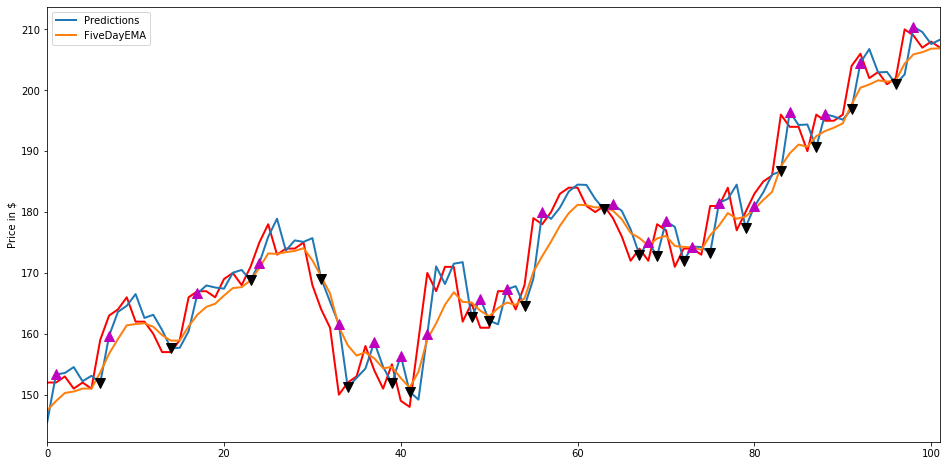

In [148]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
signals['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['Predictions', 'FiveDayEMA']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting the ARIMA Model vs 5 day Exponential Moving Average Cross Strategy 

In [150]:
# Set the initial capital

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100

portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,98800.0,98800.0,1200.0,100000.0,0.000000,0.00
2,99450.0,99450.0,1200.0,100650.0,0.006500,0.65
3,98150.0,98150.0,1200.0,99350.0,-0.012916,-0.65
4,98800.0,98800.0,1200.0,100000.0,0.006543,0.00
...,...,...,...,...,...,...
97,0.0,0.0,112350.0,112350.0,0.000000,12.35
98,135850.0,135850.0,-23500.0,112350.0,0.000000,12.35
99,134550.0,134550.0,-23500.0,111050.0,-0.011571,11.05
100,135200.0,135200.0,-23500.0,111700.0,0.005853,11.70


### Plotting Total Portfolio Value Over Time

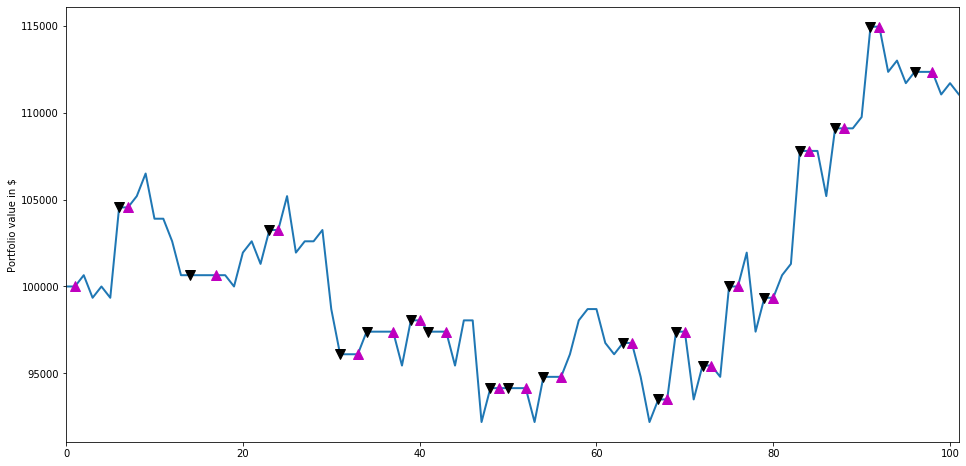

In [151]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [152]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,0.0,0.0,112350.0,112350.0,0.000000,12.35
98,135850.0,135850.0,-23500.0,112350.0,0.000000,12.35
99,134550.0,134550.0,-23500.0,111050.0,-0.011571,11.05
100,135200.0,135200.0,-23500.0,111700.0,0.005853,11.70
101,134550.0,134550.0,-23500.0,111050.0,-0.005819,11.05


### Sharpe Ratio

In [153]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.9934690978486761


## ARIMA Model with Buy Low, Sell High Strategy

In [154]:
signals  = pd.DataFrame
# Initialize the `signals` DataFrame with the `signal` column
signals = testARIMA[['Date','Adj Close', 'FiveDayEMA', 'ThirtyDayMA', 'Predictions']]

signals.head()

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions
0,2019-06-18,152,147.45,144.4,145.512398
1,2019-06-19,152,148.95,144.3,153.328116
2,2019-06-20,153,150.29,144.4,153.564716
3,2019-06-21,151,150.52,144.6,154.537370
4,2019-06-24,152,151.01,145.0,152.207118


In [155]:
res = [signals['Predictions'][i + 1] - signals['Predictions'][i] for i in range(len(signals['Adj Close'])-1)] 
signals['res'] = pd.DataFrame(res)
signals.head()

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions,res
0,2019-06-18,152,147.45,144.4,145.512398,7.815717
1,2019-06-19,152,148.95,144.3,153.328116,0.236601
2,2019-06-20,153,150.29,144.4,153.564716,0.972654
3,2019-06-21,151,150.52,144.6,154.537370,-2.330252
4,2019-06-24,152,151.01,145.0,152.207118,0.893490


In [156]:
signals['res'].describe()

count    101.000000
mean       0.621709
std        4.089989
min      -10.341359
25%       -1.962628
50%        0.505466
75%        2.658037
max       11.147223
Name: res, dtype: float64

In [157]:
signals['signal'] = 0.0

#Switched the Signal, Now Buying when I am predicting it will go up v market close andd selling when predicting it will
#go to down to market close

signals['signal'][short_window:] = np.where(signals['res'][short_window:] > 0, 1.0, 0.0) 


# Generate trading orders
signals['positions'] = signals['signal'].diff()


signals.head()

,Date,Adj Close,FiveDayEMA,ThirtyDayMA,Predictions,res,signal,positions
0,2019-06-18,152,147.45,144.4,145.512398,7.815717,0.0,NaN
1,2019-06-19,152,148.95,144.3,153.328116,0.236601,1.0,1.0
2,2019-06-20,153,150.29,144.4,153.564716,0.972654,1.0,0.0
3,2019-06-21,151,150.52,144.6,154.537370,-2.330252,0.0,-1.0
4,2019-06-24,152,151.01,145.0,152.207118,0.893490,1.0,1.0


In [158]:
signals.signal.value_counts()

1.0    56
0.0    46
Name: signal, dtype: int64

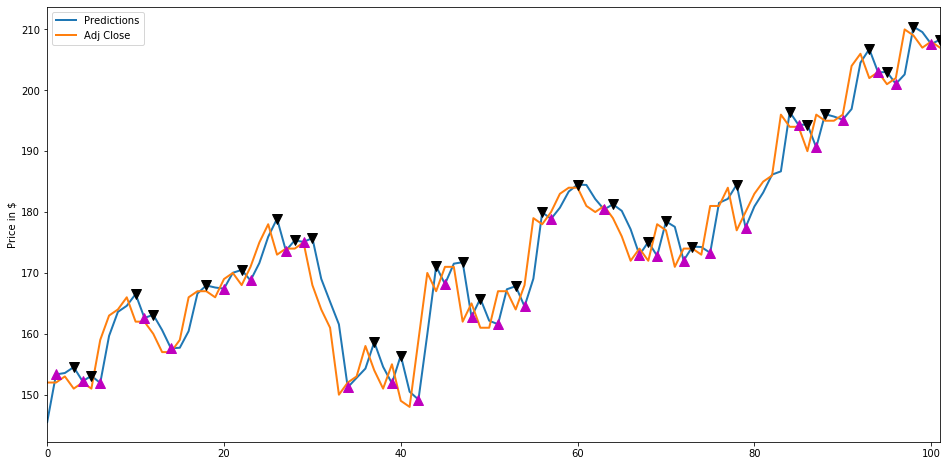

In [159]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')


# Plot the short and long moving averages
signals[['Predictions', 'Adj Close']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting the ARIMA Model with Buy Low, Sell High Strategy

In [160]:
# Set the initial capital

iinitial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']  
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100


portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,98800.0,98800.0,1200.0,100000.0,0.000000,0.00
2,99450.0,99450.0,1200.0,100650.0,0.006500,0.65
3,0.0,0.0,99350.0,99350.0,-0.012916,-0.65
4,98800.0,98800.0,550.0,99350.0,0.000000,-0.65
...,...,...,...,...,...,...
97,136500.0,136500.0,-25450.0,111050.0,0.049126,11.05
98,0.0,0.0,110400.0,110400.0,-0.005853,10.40
99,0.0,0.0,110400.0,110400.0,0.000000,10.40
100,135200.0,135200.0,-24800.0,110400.0,0.000000,10.40


### Plotting Total Portfolio Value Over Time

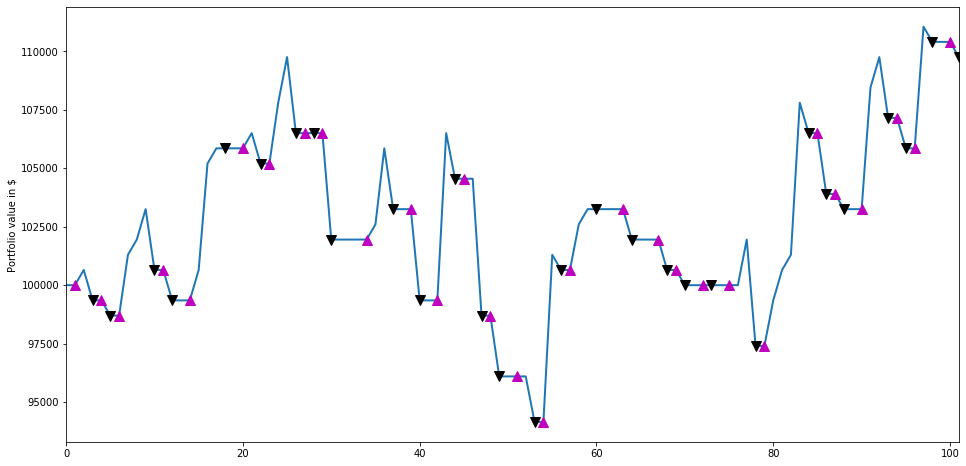

In [161]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [162]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,136500.0,136500.0,-25450.0,111050.0,0.049126,11.05
98,0.0,0.0,110400.0,110400.0,-0.005853,10.40
99,0.0,0.0,110400.0,110400.0,0.000000,10.40
100,135200.0,135200.0,-24800.0,110400.0,0.000000,10.40
101,0.0,0.0,109750.0,109750.0,-0.005888,9.75


### Sharpe Ratio

In [163]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.8789642405853149


# Testing the LSTM Model

Now lets test the LSTM Model vs the three trading strategies.

In [164]:
bestlstm = pd.DataFrame(bestlstm)
bestlstm = bestlstm.reset_index(drop=True)
bestlstm

,Close,Predictions
0,152.88,144.740753
1,153.12,148.757050
2,154.1,151.562134
3,151.76,153.242920
4,152.66,152.490723
...,...,...
97,210.5,203.490555
98,209.61,210.386993
99,207.63,212.149475
100,208.34,210.355194


In [165]:
testLSTM = CPint400[['Adj Close', 'ThirtyDayMA', 'FiveDayEMA']]
testLSTM['Date'] = CPint400.index
testLSTM = testLSTM.reset_index(drop=True)
testLSTM


,Adj Close,ThirtyDayMA,FiveDayEMA,Date
0,152,144.40,147.45,2019-06-18
1,152,144.30,148.95,2019-06-19
2,153,144.40,150.29,2019-06-20
3,151,144.60,150.52,2019-06-21
4,152,145.00,151.01,2019-06-24
...,...,...,...,...
97,210,194.75,204.38,2019-11-04
98,209,196.35,205.90,2019-11-05
99,207,197.70,206.26,2019-11-06
100,208,198.95,206.83,2019-11-07


In [166]:
testLSTM['Predictions'] = bestlstm['Predictions']
testLSTM


,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions
0,152,144.40,147.45,2019-06-18,144.740753
1,152,144.30,148.95,2019-06-19,148.757050
2,153,144.40,150.29,2019-06-20,151.562134
3,151,144.60,150.52,2019-06-21,153.242920
4,152,145.00,151.01,2019-06-24,152.490723
...,...,...,...,...,...
97,210,194.75,204.38,2019-11-04,203.490555
98,209,196.35,205.90,2019-11-05,210.386993
99,207,197.70,206.26,2019-11-06,212.149475
100,208,198.95,206.83,2019-11-07,210.355194


In [167]:
testLSTM.describe()

,Adj Close,ThirtyDayMA,FiveDayEMA,Predictions
count,102.000000,102.000000,102.000000,102.000000
mean,174.029412,168.466176,172.803039,174.183075
std,16.135844,13.334330,15.275799,16.406645
min,148.000000,144.300000,147.450000,144.740753
25%,162.000000,160.175000,161.450000,162.799469
50%,172.000000,166.850000,172.415000,174.030502
75%,182.500000,177.487500,180.425000,182.503185
max,210.000000,200.050000,206.890000,212.149475


## LSTM Model vs 30 Day Moving Average Cross Strategy

In [168]:
signals = testLSTM
signals.describe()

,Adj Close,ThirtyDayMA,FiveDayEMA,Predictions
count,102.000000,102.000000,102.000000,102.000000
mean,174.029412,168.466176,172.803039,174.183075
std,16.135844,13.334330,15.275799,16.406645
min,148.000000,144.300000,147.450000,144.740753
25%,162.000000,160.175000,161.450000,162.799469
50%,172.000000,166.850000,172.415000,174.030502
75%,182.500000,177.487500,180.425000,182.503185
max,210.000000,200.050000,206.890000,212.149475


In [169]:
# Initialize the short and long windows
short_window = 1
long_window = 5


signals.head()
signals['signal'] = 0.0

# Create signals
signals['signal'][short_window:] = np.where(signals['Predictions'][short_window:] 
                                            > signals['ThirtyDayMA'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals

,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions,signal,positions
0,152,144.40,147.45,2019-06-18,144.740753,0.0,NaN
1,152,144.30,148.95,2019-06-19,148.757050,1.0,1.0
2,153,144.40,150.29,2019-06-20,151.562134,1.0,0.0
3,151,144.60,150.52,2019-06-21,153.242920,1.0,0.0
4,152,145.00,151.01,2019-06-24,152.490723,1.0,0.0
...,...,...,...,...,...,...,...
97,210,194.75,204.38,2019-11-04,203.490555,1.0,0.0
98,209,196.35,205.90,2019-11-05,210.386993,1.0,0.0
99,207,197.70,206.26,2019-11-06,212.149475,1.0,0.0
100,208,198.95,206.83,2019-11-07,210.355194,1.0,0.0


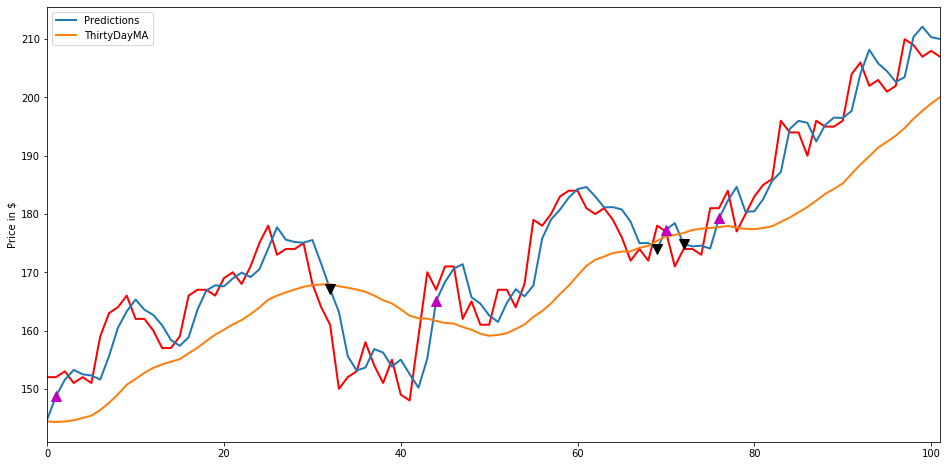

In [170]:

# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
signals['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['Predictions', 'ThirtyDayMA']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting the LSTM Model vs 30 Day Moving Average Cross Strategy

In [171]:
# Set the initial capital

iinitial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']  
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100


portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,98800.0,98800.0,1200.0,100000.0,0.000000,0.00
2,99450.0,99450.0,1200.0,100650.0,0.006500,0.65
3,98150.0,98150.0,1200.0,99350.0,-0.012916,-0.65
4,98800.0,98800.0,1200.0,100000.0,0.006543,0.00
...,...,...,...,...,...,...
97,136500.0,136500.0,-6600.0,129900.0,0.041700,29.90
98,135850.0,135850.0,-6600.0,129250.0,-0.005004,29.25
99,134550.0,134550.0,-6600.0,127950.0,-0.010058,27.95
100,135200.0,135200.0,-6600.0,128600.0,0.005080,28.60


### Plotting Total Portfolio Value Over Time

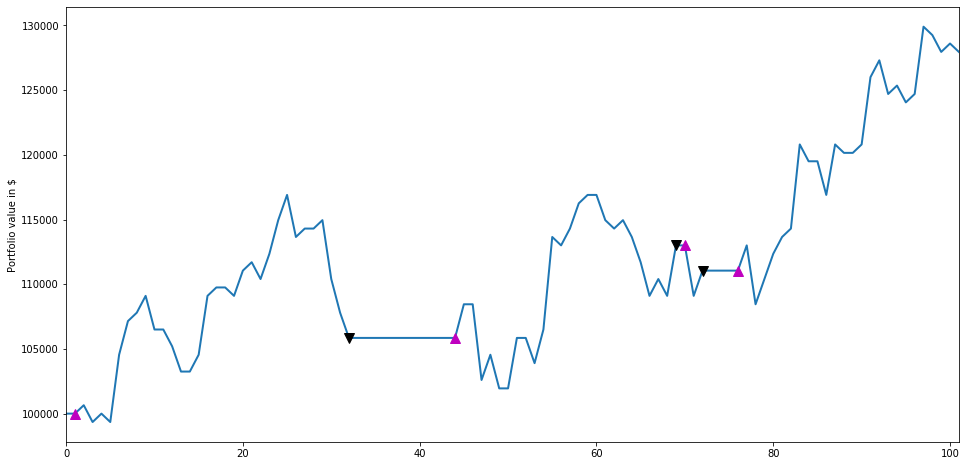

In [172]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [173]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,136500.0,136500.0,-6600.0,129900.0,0.041700,29.90
98,135850.0,135850.0,-6600.0,129250.0,-0.005004,29.25
99,134550.0,134550.0,-6600.0,127950.0,-0.010058,27.95
100,135200.0,135200.0,-6600.0,128600.0,0.005080,28.60
101,134550.0,134550.0,-6600.0,127950.0,-0.005054,27.95


### Sharpe Ratio

In [174]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

2.1019986455107267


## LSTM Model vs 5 Day Exponential Moving Average Cross Strategy

In [175]:
signals = testLSTM
signals.describe()

,Adj Close,ThirtyDayMA,FiveDayEMA,Predictions,signal,positions
count,102.000000,102.000000,102.000000,102.000000,102.000000,101.000000
mean,174.029412,168.466176,172.803039,174.183075,0.823529,0.009901
std,16.135844,13.334330,15.275799,16.406645,0.383103,0.264388
min,148.000000,144.300000,147.450000,144.740753,0.000000,-1.000000
25%,162.000000,160.175000,161.450000,162.799469,1.000000,0.000000
50%,172.000000,166.850000,172.415000,174.030502,1.000000,0.000000
75%,182.500000,177.487500,180.425000,182.503185,1.000000,0.000000
max,210.000000,200.050000,206.890000,212.149475,1.000000,1.000000


In [176]:
# Initialize the short and long windows
short_window = 1
long_window = 5


signals.head()
signals['signal'] = 0.0

# Create signals
signals['signal'][short_window:] = np.where(signals['Predictions'][short_window:] 
                                            > signals['FiveDayEMA'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals

,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions,signal,positions
0,152,144.40,147.45,2019-06-18,144.740753,0.0,NaN
1,152,144.30,148.95,2019-06-19,148.757050,0.0,0.0
2,153,144.40,150.29,2019-06-20,151.562134,1.0,1.0
3,151,144.60,150.52,2019-06-21,153.242920,1.0,0.0
4,152,145.00,151.01,2019-06-24,152.490723,1.0,0.0
...,...,...,...,...,...,...,...
97,210,194.75,204.38,2019-11-04,203.490555,0.0,-1.0
98,209,196.35,205.90,2019-11-05,210.386993,1.0,1.0
99,207,197.70,206.26,2019-11-06,212.149475,1.0,0.0
100,208,198.95,206.83,2019-11-07,210.355194,1.0,0.0


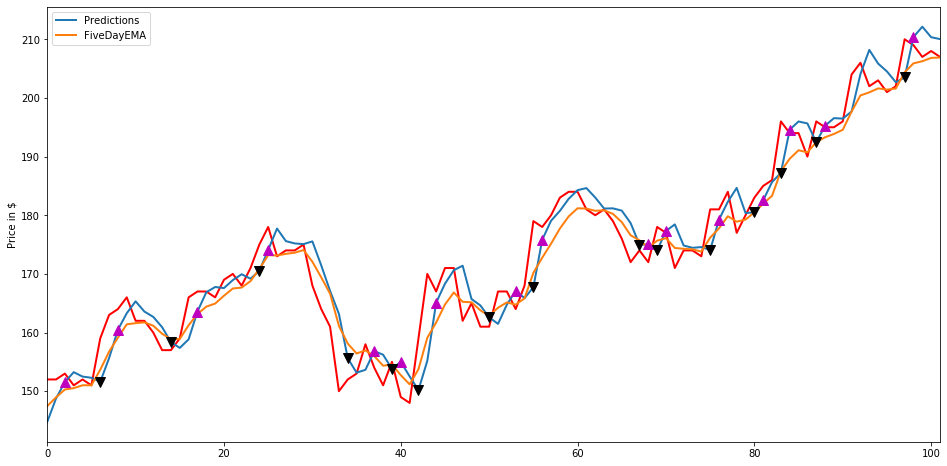

In [177]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
signals['Adj Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['Predictions', 'FiveDayEMA']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting the LSTM Model vs 5 Day Exponential Moving Average Cross Strategy

In [178]:
# Set the initial capital

iinitial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']  
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100

portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,0.0,0.0,100000.0,100000.0,0.000000,0.00
2,99450.0,99450.0,550.0,100000.0,0.000000,0.00
3,98150.0,98150.0,550.0,98700.0,-0.013000,-1.30
4,98800.0,98800.0,550.0,99350.0,0.006586,-0.65
...,...,...,...,...,...,...
97,0.0,0.0,124050.0,124050.0,0.043753,24.05
98,135850.0,135850.0,-11800.0,124050.0,0.000000,24.05
99,134550.0,134550.0,-11800.0,122750.0,-0.010480,22.75
100,135200.0,135200.0,-11800.0,123400.0,0.005295,23.40


### Plotting Total Portfolio Value Over Time

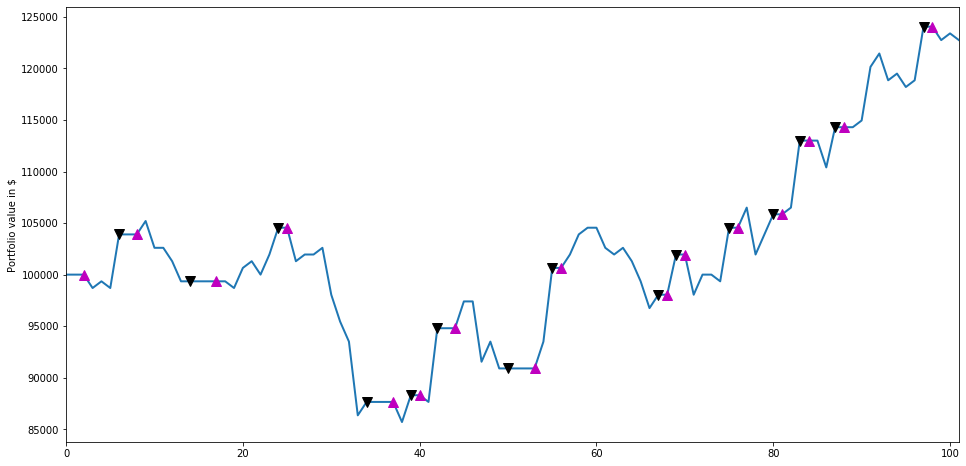

In [179]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [180]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,0.0,0.0,124050.0,124050.0,0.043753,24.05
98,135850.0,135850.0,-11800.0,124050.0,0.000000,24.05
99,134550.0,134550.0,-11800.0,122750.0,-0.010480,22.75
100,135200.0,135200.0,-11800.0,123400.0,0.005295,23.40
101,134550.0,134550.0,-11800.0,122750.0,-0.005267,22.75


### Sharpe Ratio

In [181]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.5270747321144018


## LSTM Model with Buy Low, Sell High Strategy

In [182]:
signals = testLSTM

In [183]:
res = [signals['Predictions'][i + 1] - signals['Predictions'][i] for i in range(len(signals['Adj Close'])-1)] 
signals['res'] = pd.DataFrame(res)
signals.head()

,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions,signal,positions,res
0,152,144.4,147.45,2019-06-18,144.740753,0.0,NaN,4.016296
1,152,144.3,148.95,2019-06-19,148.757050,0.0,0.0,2.805084
2,153,144.4,150.29,2019-06-20,151.562134,1.0,1.0,1.680786
3,151,144.6,150.52,2019-06-21,153.242920,1.0,0.0,-0.752197
4,152,145.0,151.01,2019-06-24,152.490723,1.0,0.0,-0.203262


In [184]:
# Initialize the short and long windows
short_window = 1
long_window = 5

signals['signal'] = 0.0

#Switched the Signal, Now Buying when I am predicting it will go up v market close andd selling when predicting it will
#go to down to market close

signals['signal'][short_window:] = np.where(signals['res'][short_window:] > 0, 1.0, 0.0) 


# Generate trading orders
signals['positions'] = signals['signal'].diff()


signals.head()

,Adj Close,ThirtyDayMA,FiveDayEMA,Date,Predictions,signal,positions,res
0,152,144.4,147.45,2019-06-18,144.740753,0.0,NaN,4.016296
1,152,144.3,148.95,2019-06-19,148.757050,1.0,1.0,2.805084
2,153,144.4,150.29,2019-06-20,151.562134,1.0,0.0,1.680786
3,151,144.6,150.52,2019-06-21,153.242920,0.0,-1.0,-0.752197
4,152,145.0,151.01,2019-06-24,152.490723,0.0,0.0,-0.203262


In [185]:
signals.signal.value_counts()

1.0    55
0.0    47
Name: signal, dtype: int64

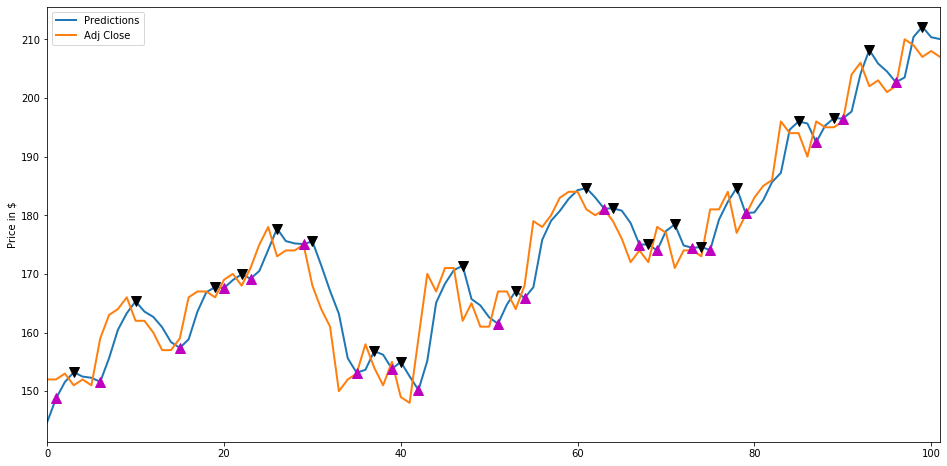

In [186]:
# Initialize the plot figure
fig = plt.figure(figsize = (16,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')


# Plot the short and long moving averages
signals[['Predictions', 'Adj Close']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.Predictions[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.Predictions[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()


### Backtesting the LSTM Model with Buy Low, Sell High Strategy

In [187]:
# Set the initial capital

initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['NVDA'] = 650*signals['signal']  
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(signals['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(signals['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(signals['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

portfolio['total returns'] = (portfolio['total']/100000 -1) *100


portfolio

,NVDA,holdings,cash,total,returns,total returns
0,0.0,0.0,100000.0,100000.0,NaN,0.00
1,98800.0,98800.0,1200.0,100000.0,0.000000,0.00
2,99450.0,99450.0,1200.0,100650.0,0.006500,0.65
3,0.0,0.0,99350.0,99350.0,-0.012916,-0.65
4,0.0,0.0,99350.0,99350.0,0.000000,-0.65
...,...,...,...,...,...,...
97,136500.0,136500.0,-22200.0,114300.0,0.047663,14.30
98,135850.0,135850.0,-22200.0,113650.0,-0.005687,13.65
99,0.0,0.0,112350.0,112350.0,-0.011439,12.35
100,0.0,0.0,112350.0,112350.0,0.000000,12.35


### Plotting Total Portfolio Value Over Time

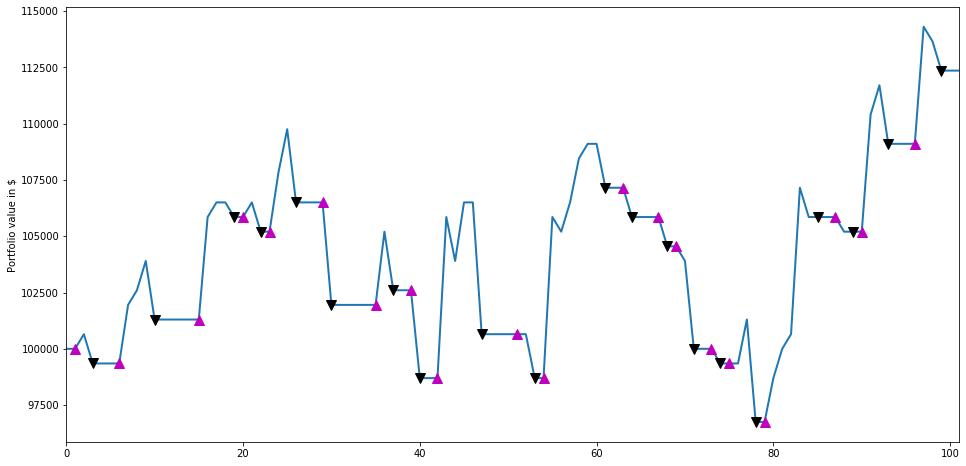

In [188]:
# Create a figure
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [189]:
portfolio.tail()

,NVDA,holdings,cash,total,returns,total returns
97,136500.0,136500.0,-22200.0,114300.0,0.047663,14.30
98,135850.0,135850.0,-22200.0,113650.0,-0.005687,13.65
99,0.0,0.0,112350.0,112350.0,-0.011439,12.35
100,0.0,0.0,112350.0,112350.0,0.000000,12.35
101,0.0,0.0,112350.0,112350.0,0.000000,12.35


### Sharpe Ratio

In [190]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.061668418382044


# Evaluating the Models & Strategies

After testing each model witht the three trading strategies, the best three model/strategies in terms of "Total Portfolio Value" were 1) The ARIMA 30 Day Moving Average Cross Strategy with a 29.75% return on investment, 2) The LSTM 30 Day Moving Average Cross Strategy with a 27.95% return on investment and 3) The LSTM 5 Day Exponential Moving average Cross Strategy with a 22.750% return on investment. 


In [191]:
conclusion = pd.DataFrame()

In [195]:
data = [['LongShort Cross', 21.474, 12473.64, 0.449], ['5Day30Day Cross', 14.843, 114842.75, 0.377], 
        ['Arima30Day Cross', 29.250, 129250, 2.194], ['Arima5Day Cross', 11.05, 111050, .994],
        ['Arima High Low', 9.75, 109750, 0.879], ['LSTM30Day Cross', 27.95, 127950, 2.102], 
        ['LSTM5Day Cross', 22.75, 122750, 1.527 ], ['LSTM High Low', 12.350, 112350, 1.062]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Model_Name', '% Return', 'Total Portfolio Value', 'Sharpe Ratio']) 

In [201]:
df

,Model_Name,% Return,Total Portfolio Value,Sharpe Ratio
0,LongShort Cross,21.474,12473.64,0.449
1,5Day30Day Cross,14.843,114842.75,0.377
2,Arima30Day Cross,29.250,129250.00,2.194
3,Arima5Day Cross,11.050,111050.00,0.994
4,Arima High Low,9.750,109750.00,0.879
5,LSTM30Day Cross,27.950,127950.00,2.102
6,LSTM5Day Cross,22.750,122750.00,1.527
7,LSTM High Low,12.350,112350.00,1.062


In [202]:
df["% Return"].sort_values()

4     9.750
3    11.050
7    12.350
1    14.843
0    21.474
6    22.750
5    27.950
2    29.250
Name: % Return, dtype: float64

# Conclusion

While my models and strategies did a good job buying and selling stocks in terms of my portfolios return, I think that there are many more steps I can take to improve this tool. While no stock market model is 100% accurate, I am please that both my LSTM and ARIMA model were very accurate at predicting NVDA stock price. However, I would like to continue to update this tool by optimizing my LSTM and ARMIA models and  by introducing other predictions models. Furthermore, I would like to integrate more trading strategies into this tool in order to test how more complex trading strategies could help this tool perform better. In the future, I can see this model evolve into a much more sophisticated agolorithmic trading tool that could be used by a trading firm. 